In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.svm import SVC
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_bureau=pd.read_csv('bureau_data.csv')
df_customers=pd.read_csv('customers.csv')
df_loan=pd.read_csv('loans.csv')

In [3]:
df_bureau.shape,df_customers.shape,df_loan.shape

((50000, 8), (50000, 12), (50000, 15))

In [4]:
df=pd.merge(df_bureau,df_customers,on='cust_id')
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,1,1,42,0,0,3,7,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,3,1,96,12,60,5,4,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,2,1,82,24,147,6,58,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,3,0,115,15,87,5,26,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,4,2,120,0,0,5,10,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df=pd.merge(df,df_loan,on='cust_id')

In [6]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df.shape

(50000, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   number_of_open_accounts      50000 non-null  int64  
 2   number_of_closed_accounts    50000 non-null  int64  
 3   total_loan_months            50000 non-null  int64  
 4   delinquent_months            50000 non-null  int64  
 5   total_dpd                    50000 non-null  int64  
 6   enquiry_count                50000 non-null  int64  
 7   credit_utilization_ratio     50000 non-null  int64  
 8   age                          50000 non-null  int64  
 9   gender                       50000 non-null  object 
 10  marital_status               50000 non-null  object 
 11  employment_status            50000 non-null  object 
 12  income                       50000 non-null  int64  
 13  number_of_depend

In [9]:
df['default']=df['default'].astype('int')

In [10]:
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,0
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,0
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,0
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,0
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,0


In [11]:
df = df.drop_duplicates()
df.shape

(50000, 33)

In [12]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

class imbalance 

In [14]:
df.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default'],
      dtype='object')

In [15]:
X=df.drop('default',axis=1)
y=df['default']

In [16]:
X.shape

(50000, 32)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Train and Test are seperated to avoid Data Leakage 

In [19]:
df_train=pd.concat([X_train,y_train],axis='columns')
df_test=pd.concat([X_test,y_test],axis='columns')

In [20]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

### Data Cleaning

In [22]:
for feature in df.columns:
    print(f"Unique values in {feature}: {df[feature].unique()}")


Unique values in cust_id: ['C00001' 'C00002' 'C00003' ... 'C49998' 'C49999' 'C50000']
Unique values in number_of_open_accounts: [1 3 2 4]
Unique values in number_of_closed_accounts: [1 0 2]
Unique values in total_loan_months: [ 42  96  82 115 120  79  52   5  40  26  41  57  63   9  37   2  61 102
  59 137 149  70 106  46 131  58  16  93  65  86 169  15  54 107 108 105
  98  69 141  50  20   3  24 110  72  99  10  53  13 161  89  44  35 103
  49  17 146  36  66 116 118  77 138  22  51  38 113  90  74  85   6  95
  75  47  71  87  27 126 104  60 114 145  62 163  29  39  33 119  31 134
 101 147  28 139  78 132  48 130  18  76  25  23  11  84  97   4 144 182
  56 150 128  30 142 152  83   1 167  92 178 170  45  34 154  55 151 111
  43  19 133  64 188 173  67 155  68  21   8  14  73 162  88 129 117 100
  94 183 135 204   7 184  81 159 175  91 112 127 125 166 156 124 168  32
 109 148  80 157 194 153 123 171 179 191 216 140 143 164  12 121 136 160
 122 172 158 212 186 205 203 197 185 177 208

In [23]:
df_train.isna().sum()

cust_id                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_a

In [24]:
mode_residence=df_train['residence_type'].mode()[0]
df_train['residence_type']=df_train['residence_type'].fillna(mode_residence)
df_train.isna().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [25]:
mode_residence_test=df_test['residence_type'].mode()[0]
df_test['residence_type']=df_test['residence_type'].fillna(mode_residence_test)
df_test.isna().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 27434 to 15795
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      37500 non-null  object 
 1   number_of_open_accounts      37500 non-null  int64  
 2   number_of_closed_accounts    37500 non-null  int64  
 3   total_loan_months            37500 non-null  int64  
 4   delinquent_months            37500 non-null  int64  
 5   total_dpd                    37500 non-null  int64  
 6   enquiry_count                37500 non-null  int64  
 7   credit_utilization_ratio     37500 non-null  int64  
 8   age                          37500 non-null  int64  
 9   gender                       37500 non-null  object 
 10  marital_status               37500 non-null  object 
 11  employment_status            37500 non-null  object 
 12  income                       37500 non-null  int64  
 13  number_of_dependa

In [27]:
df_train.select_dtypes(include=['int64', 'float64']).columns
df_train.select_dtypes(include='object').columns


Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [28]:
df_train['zipcode']=df_train['zipcode'].astype('object')
df_test['zipcode']=df_test['zipcode'].astype('object')

In [29]:
columns_continous=['number_of_open_accounts', 'number_of_closed_accounts','total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
    'credit_utilization_ratio', 'age', 'income', 'number_of_dependants','years_at_current_address','sanction_amount', 'loan_amount',
    'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months','principal_outstanding', 'bank_balance_at_application']
columns_categorical=['cust_id', 'gender', 'marital_status', 'employment_status','residence_type', 'city', 'state', 'loan_id',
                     'loan_purpose','loan_type', 'disbursal_date', 'installment_start_dt','zipcode']

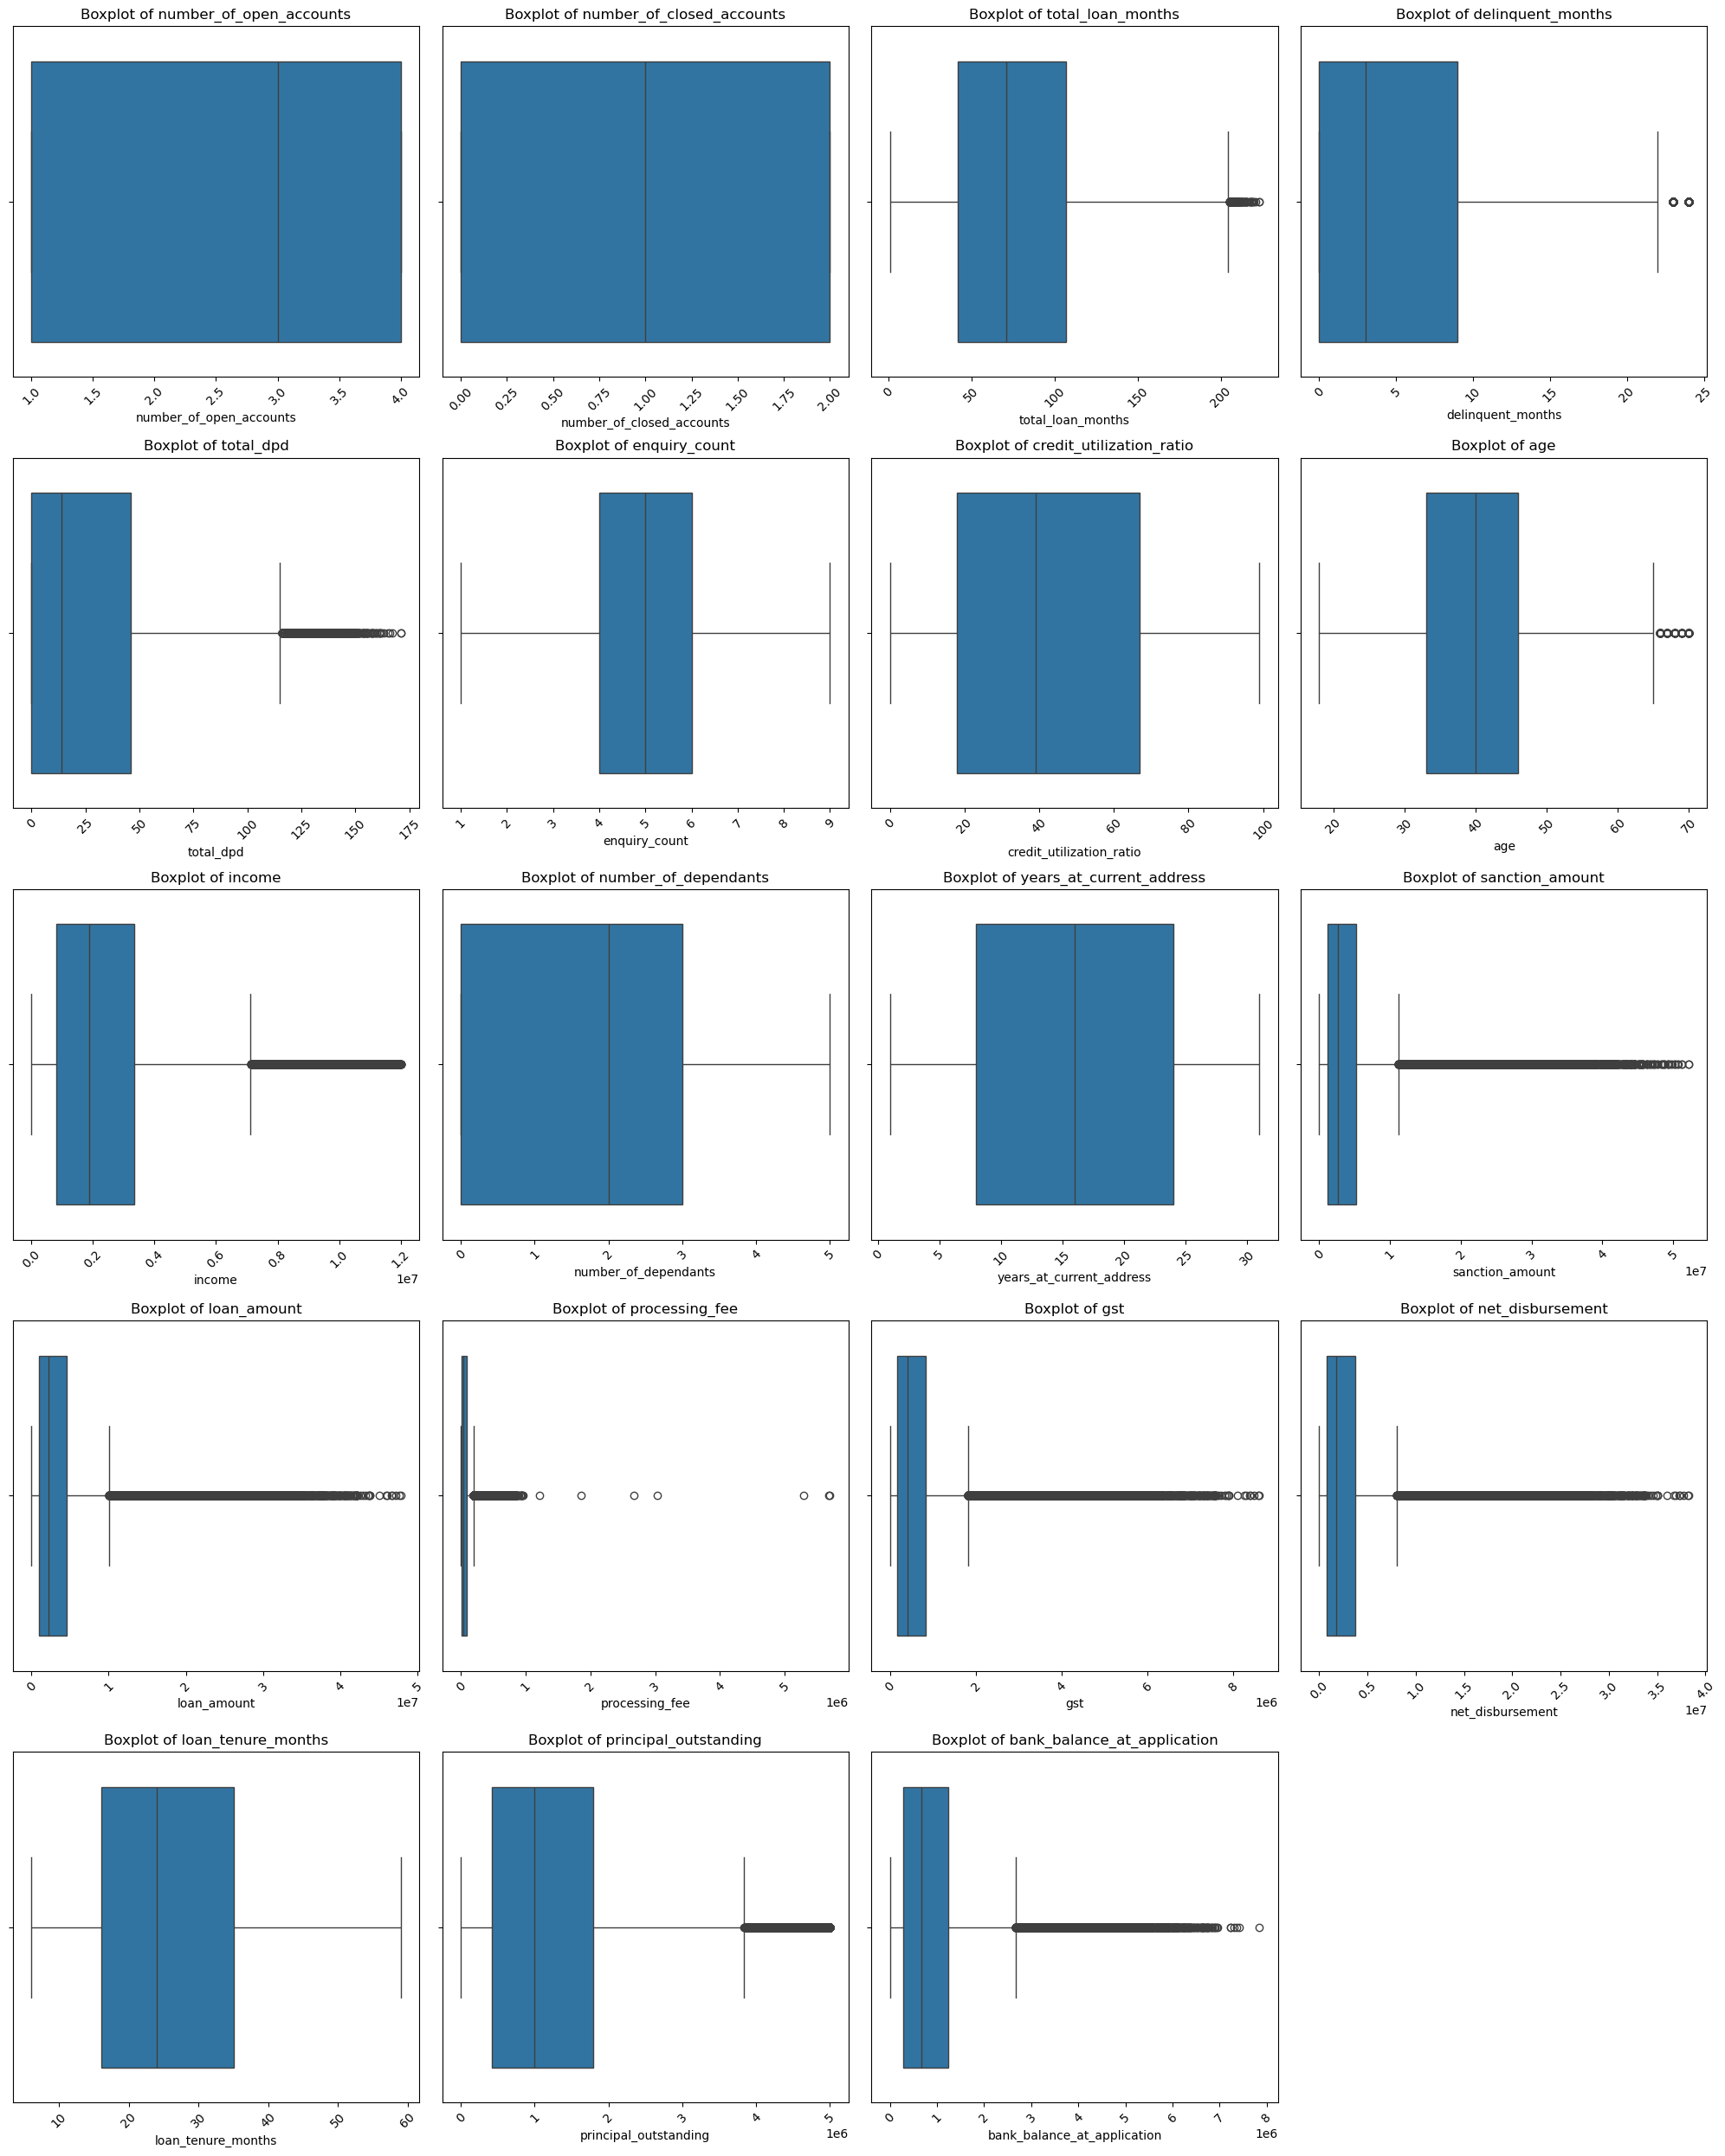

In [30]:
n_cols = 4
n_rows = len(columns_continous) // n_cols + (len(columns_continous) % n_cols != 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns_continous):
    sns.boxplot(ax=axes[i], data=df, x=col)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=45) 
for i in range(len(columns_continous), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

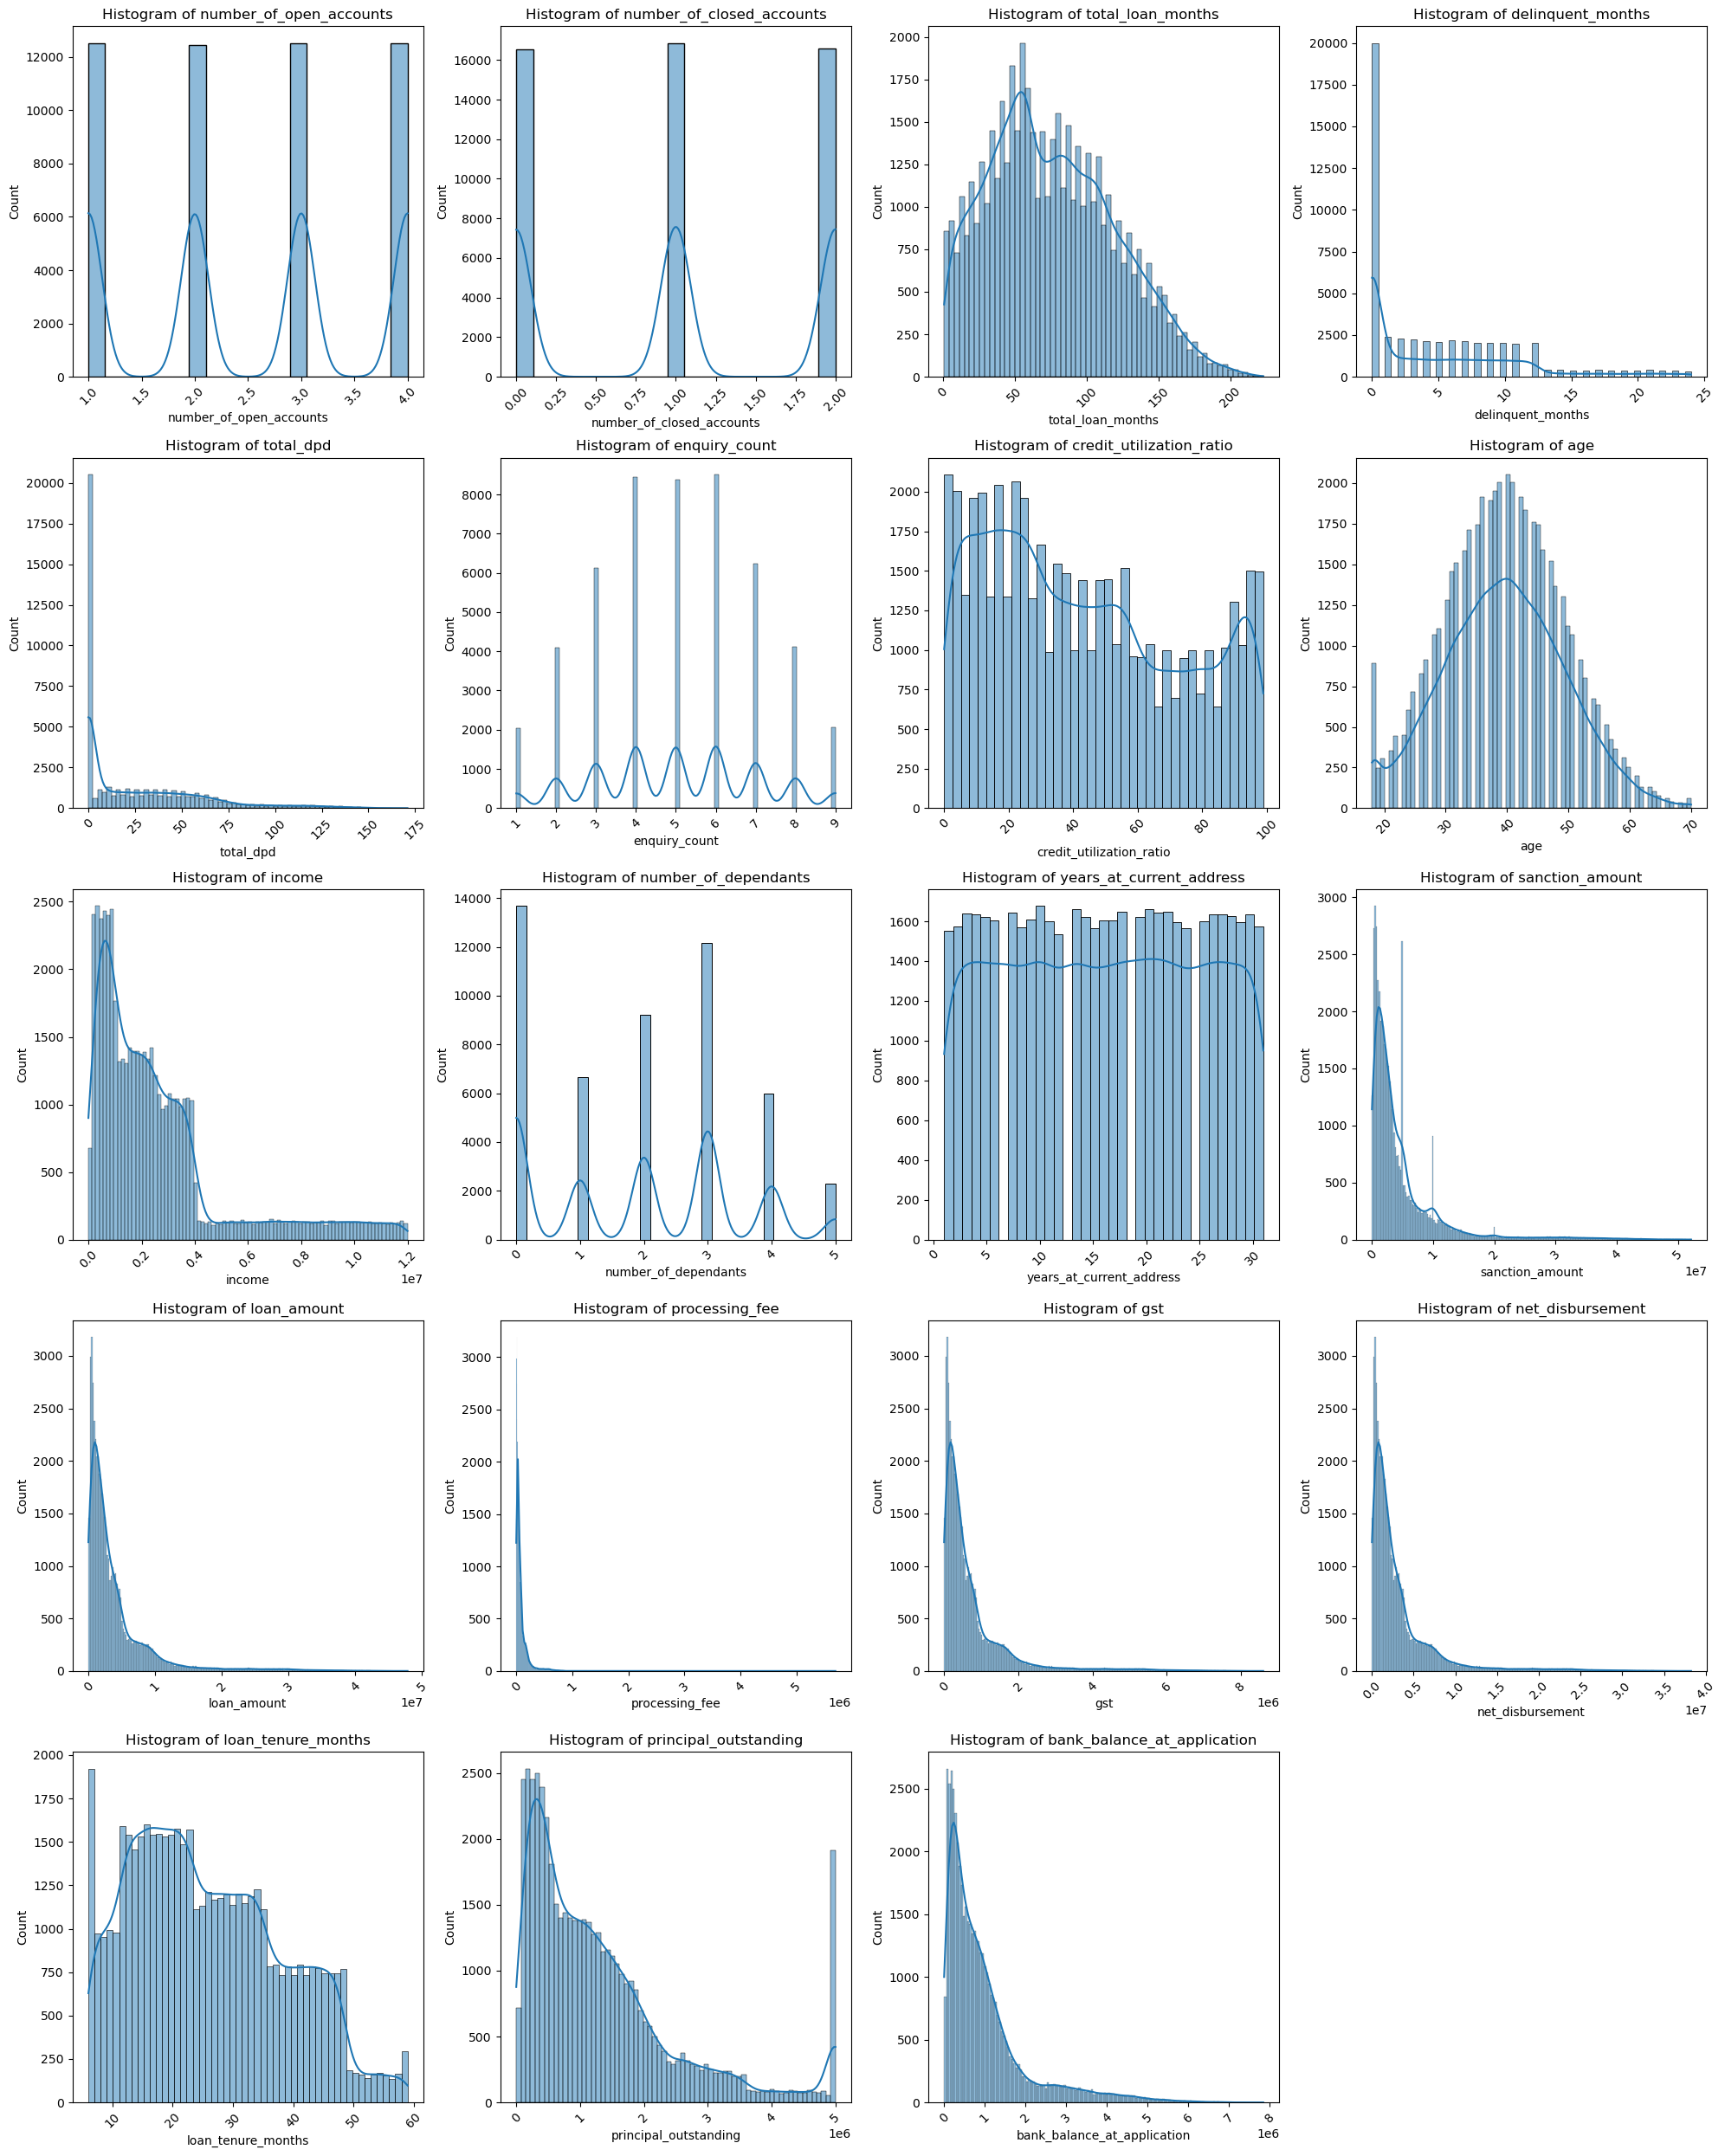

In [31]:
n_cols = 4
n_rows = len(columns_continous) // n_cols + (len(columns_continous) % n_cols != 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns_continous):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(columns_continous), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [32]:
df_train.describe()

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,income,number_of_dependants,years_at_current_address,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
count,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000,37500.000
mean,2.496,0.997,76.000,4.892,26.936,5.003,43.328,39.565,2636054.827,1.943,15.994,4706706.560,4002796.640,80724.109,720503.395,3202237.312,25.897,1336077.193,987467.442,0.085
std,1.117,0.815,43.706,5.864,32.925,2.024,29.355,9.854,2624140.923,1.536,8.938,6288692.940,5400902.405,120830.650,972162.433,4320721.924,12.423,1213733.928,1045108.577,0.279
min,1.000,0.000,1.000,0.000,0.000,1.000,0.000,18.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,6.000,-1.000,0.000,0.000
25%,1.000,0.000,42.000,0.000,0.000,4.000,18.000,33.000,803000.000,0.000,8.000,1136000.000,959000.000,19180.000,172620.000,767200.000,16.000,423931.000,286189.500,0.000
50%,2.000,1.000,71.000,3.000,14.000,5.000,39.000,40.000,1884000.000,2.000,16.000,2651000.000,2234000.000,44700.000,402120.000,1787200.000,24.000,1000881.500,666825.000,0.000
75%,3.000,2.000,107.000,9.000,46.000,6.000,67.000,46.000,3332000.000,3.000,24.000,5159000.000,4597250.000,92000.000,827505.000,3677800.000,35.000,1789091.750,1236740.500,0.000
max,4.000,2.000,223.000,24.000,171.000,9.000,99.000,70.000,11999000.000,5.000,31.000,52175000.000,47667000.000,5698029.901,8580060.000,38133600.000,59.000,5000000.000,7846643.000,1.000


In [33]:
df_train=df_train[df_train['principal_outstanding']>0]

In [34]:
df_train.describe()

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,income,number_of_dependants,years_at_current_address,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
count,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000,37494.000
mean,2.496,0.997,75.996,4.892,26.939,5.003,43.329,39.564,2636476.663,1.942,15.993,4707459.754,4003437.190,80737.027,720618.694,3202749.752,25.896,1336290.999,987625.462,0.085
std,1.117,0.815,43.707,5.864,32.926,2.024,29.355,9.855,2624138.978,1.536,8.938,6288914.213,5401097.143,120836.002,972197.486,4320877.715,12.424,1213713.343,1045117.535,0.279
min,1.000,0.000,1.000,0.000,0.000,1.000,0.000,18.000,100000.000,0.000,1.000,71000.000,50000.000,1000.000,9000.000,40000.000,6.000,35999.000,19415.000,0.000
25%,1.000,0.000,42.000,0.000,0.000,4.000,18.000,33.000,803000.000,0.000,8.000,1136250.000,960000.000,19200.000,172800.000,768000.000,16.000,424079.000,286243.750,0.000
50%,2.000,1.000,71.000,3.000,14.000,5.000,39.000,40.000,1884000.000,2.000,16.000,2652000.000,2235000.000,44710.000,402300.000,1788000.000,24.000,1000981.500,666919.000,0.000
75%,3.000,2.000,107.000,9.000,46.000,6.000,67.000,46.000,3332000.000,3.000,24.000,5159000.000,4598000.000,92000.000,827640.000,3678400.000,35.000,1789274.000,1236747.250,0.000
max,4.000,2.000,223.000,24.000,171.000,9.000,99.000,70.000,11999000.000,5.000,31.000,52175000.000,47667000.000,5698029.901,8580060.000,38133600.000,59.000,5000000.000,7846643.000,1.000


In [35]:
df_test.describe()

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,income,number_of_dependants,years_at_current_address,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
count,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000,12500.000
mean,2.511,1.014,76.510,4.840,26.624,5.028,43.462,39.510,2655425.520,1.931,16.092,4699190.400,3990325.280,79806.506,718258.550,3192260.224,26.072,1342312.571,994103.205,0.089
std,1.123,0.811,43.932,5.809,32.554,2.045,29.360,9.829,2645329.939,1.535,8.891,6202829.518,5303033.171,106060.663,954545.971,4242426.537,12.463,1217685.715,1048982.647,0.284
min,1.000,0.000,1.000,0.000,0.000,1.000,0.000,18.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,6.000,-1.000,0.000,0.000
25%,1.000,0.000,43.000,0.000,0.000,4.000,18.000,33.000,804750.000,0.000,8.000,1174750.000,989000.000,19780.000,178020.000,791200.000,16.000,427161.250,289406.500,0.000
50%,3.000,1.000,72.000,3.000,14.000,5.000,39.000,40.000,1916000.000,2.000,16.000,2669000.000,2251000.000,45020.000,405180.000,1800800.000,25.000,1005422.000,673471.500,0.000
75%,4.000,2.000,107.000,8.000,46.000,7.000,67.000,46.000,3336250.000,3.000,24.000,5233500.000,4652750.000,93055.000,837495.000,3722200.000,35.000,1796377.250,1245145.000,0.000
max,4.000,2.000,221.000,24.000,162.000,9.000,99.000,70.000,11990000.000,5.000,31.000,49622000.000,47819000.000,956380.000,8607420.000,38255200.000,59.000,5000000.000,6903073.000,1.000


In [36]:
df_test=df_test[df_test['principal_outstanding']>0]

In [37]:
df_test.describe()

,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,income,number_of_dependants,years_at_current_address,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
count,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000
mean,2.511,1.014,76.509,4.838,26.611,5.028,43.464,39.511,2655850.456,1.931,16.093,4699942.391,3990963.834,79819.277,718373.490,3192771.067,26.071,1342527.376,994262.287,0.089
std,1.123,0.811,43.935,5.807,32.540,2.045,29.362,9.829,2645328.286,1.535,8.891,6203040.942,5303217.211,106064.344,954579.098,4242573.769,12.462,1217664.730,1048991.188,0.284
min,1.000,0.000,1.000,0.000,0.000,1.000,0.000,18.000,100000.000,0.000,1.000,72000.000,56000.000,1120.000,10080.000,44800.000,6.000,35189.000,21106.000,0.000
25%,1.000,0.000,43.000,0.000,0.000,4.000,18.000,33.000,805000.000,0.000,8.000,1176000.000,989250.000,19785.000,178065.000,791400.000,16.000,427427.250,289595.750,0.000
50%,3.000,1.000,72.000,3.000,14.000,5.000,39.000,40.000,1916500.000,2.000,16.000,2669500.000,2252000.000,45040.000,405360.000,1801600.000,25.000,1005512.000,673572.000,0.000
75%,4.000,2.000,107.000,8.000,46.000,7.000,67.000,46.000,3336750.000,3.000,24.000,5236500.000,4654250.000,93085.000,837765.000,3723400.000,35.000,1796391.750,1245243.000,0.000
max,4.000,2.000,221.000,24.000,162.000,9.000,99.000,70.000,11990000.000,5.000,31.000,49622000.000,47819000.000,956380.000,8607420.000,38255200.000,59.000,5000000.000,6903073.000,1.000


In [38]:
df_train[df_train['net_disbursement']>df_train['loan_amount']]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [39]:
df_test[df_test['net_disbursement']>df_test['loan_amount']]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [40]:
df_train[df_train['gst']/df_train['loan_amount']>0.2]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [41]:
df_test[df_test['gst']/df_test['loan_amount']>0.2]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [42]:
df_train=df_train[df_train['processing_fee']/df_train['loan_amount']<0.03]

In [43]:
df_train.shape

(37487, 33)

In [44]:
df_test=df_test[df_test['processing_fee']/df_test['loan_amount']<0.03]

In [45]:
df_test.shape

(12498, 33)

In [46]:
df_train[df_train['sanction_amount']<df_train['loan_amount']]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [47]:
df_test[df_test['sanction_amount']<df_test['loan_amount']]

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [48]:
columns_categorical

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt',
 'zipcode']

In [49]:
for col in columns_categorical:
    print(f'{col} unique values : {df_train[col].unique()}')

cust_id unique values : ['C27435' 'C13401' 'C00884' ... 'C38159' 'C00861' 'C15796']
gender unique values : ['F' 'M']
marital_status unique values : ['Single' 'Married']
employment_status unique values : ['Salaried' 'Self-Employed']
residence_type unique values : ['Owned' 'Mortgage' 'Rented']
city unique values : ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state unique values : ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_id unique values : ['L27435' 'L13401' 'L00884' ... 'L38159' 'L00861' 'L15796']
loan_purpose unique values : ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type unique values : ['Secured' 'Unsecured']
disbursal_date unique values : ['2022-04-21' '2020-11-24' '2019-08-25' ... '2024-04-06' '2021-11-30'
 '2021-11-24']
installment_start_dt unique values : ['2022-05-21' '2020-12-11' '2019-09-19' ... '2024-08-16' '2019-07-27'
 '2022-12-0

In [50]:
df_train['loan_purpose']=df_train['loan_purpose'].replace('Personaal','Personal')

In [51]:
df_train['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [52]:
for col in columns_categorical:
    print(f'{col} unique values : {df_test[col].unique()}')

cust_id unique values : ['C33554' 'C09428' 'C00200' ... 'C30391' 'C06798' 'C37271']
gender unique values : ['F' 'M']
marital_status unique values : ['Married' 'Single']
employment_status unique values : ['Self-Employed' 'Salaried']
residence_type unique values : ['Owned' 'Rented' 'Mortgage']
city unique values : ['Hyderabad' 'Jaipur' 'Delhi' 'Pune' 'Chennai' 'Ahmedabad' 'Lucknow'
 'Kolkata' 'Bangalore' 'Mumbai']
state unique values : ['Telangana' 'Rajasthan' 'Delhi' 'Maharashtra' 'Tamil Nadu' 'Gujarat'
 'Uttar Pradesh' 'West Bengal' 'Karnataka']
loan_id unique values : ['L33554' 'L09428' 'L00200' ... 'L30391' 'L06798' 'L37271']
loan_purpose unique values : ['Education' 'Home' 'Auto' 'Personal' 'Personaal']
loan_type unique values : ['Secured' 'Unsecured']
disbursal_date unique values : ['2022-11-30' '2020-07-02' '2019-07-31' ... '2020-11-30' '2023-12-01'
 '2023-03-13']
installment_start_dt unique values : ['2022-12-21' '2020-07-15' '2019-08-02' ... '2024-08-11' '2021-05-15'
 '2023-04-2

In [53]:
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

### Exploratory Data Analysis

default
0    34298
1     3189
Name: count, dtype: int64


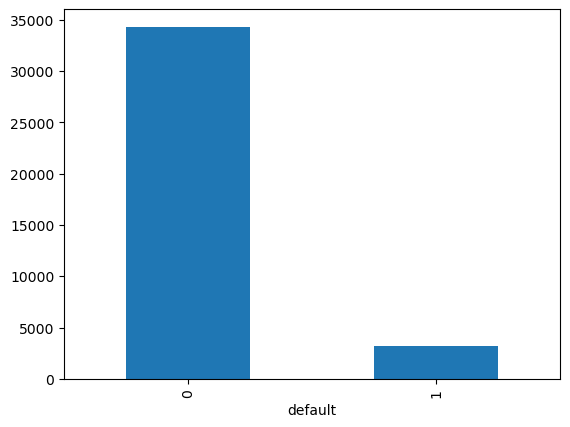

In [55]:
print(df_train['default'].value_counts())
df_train['default'].value_counts().plot(kind='bar')
plt.show()

default
0    11390
1     1108
Name: count, dtype: int64


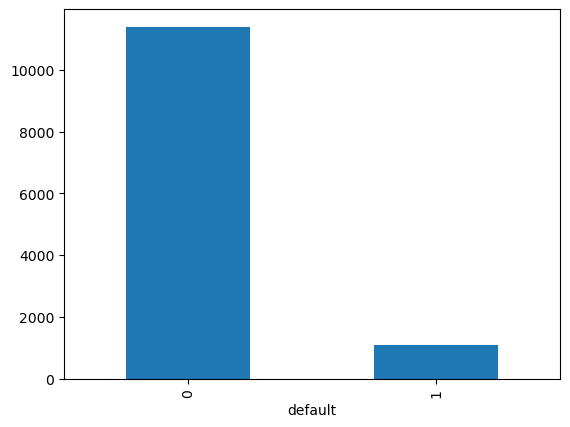

In [56]:
print(df_test['default'].value_counts())
df_test['default'].value_counts().plot(kind='bar')
plt.show()

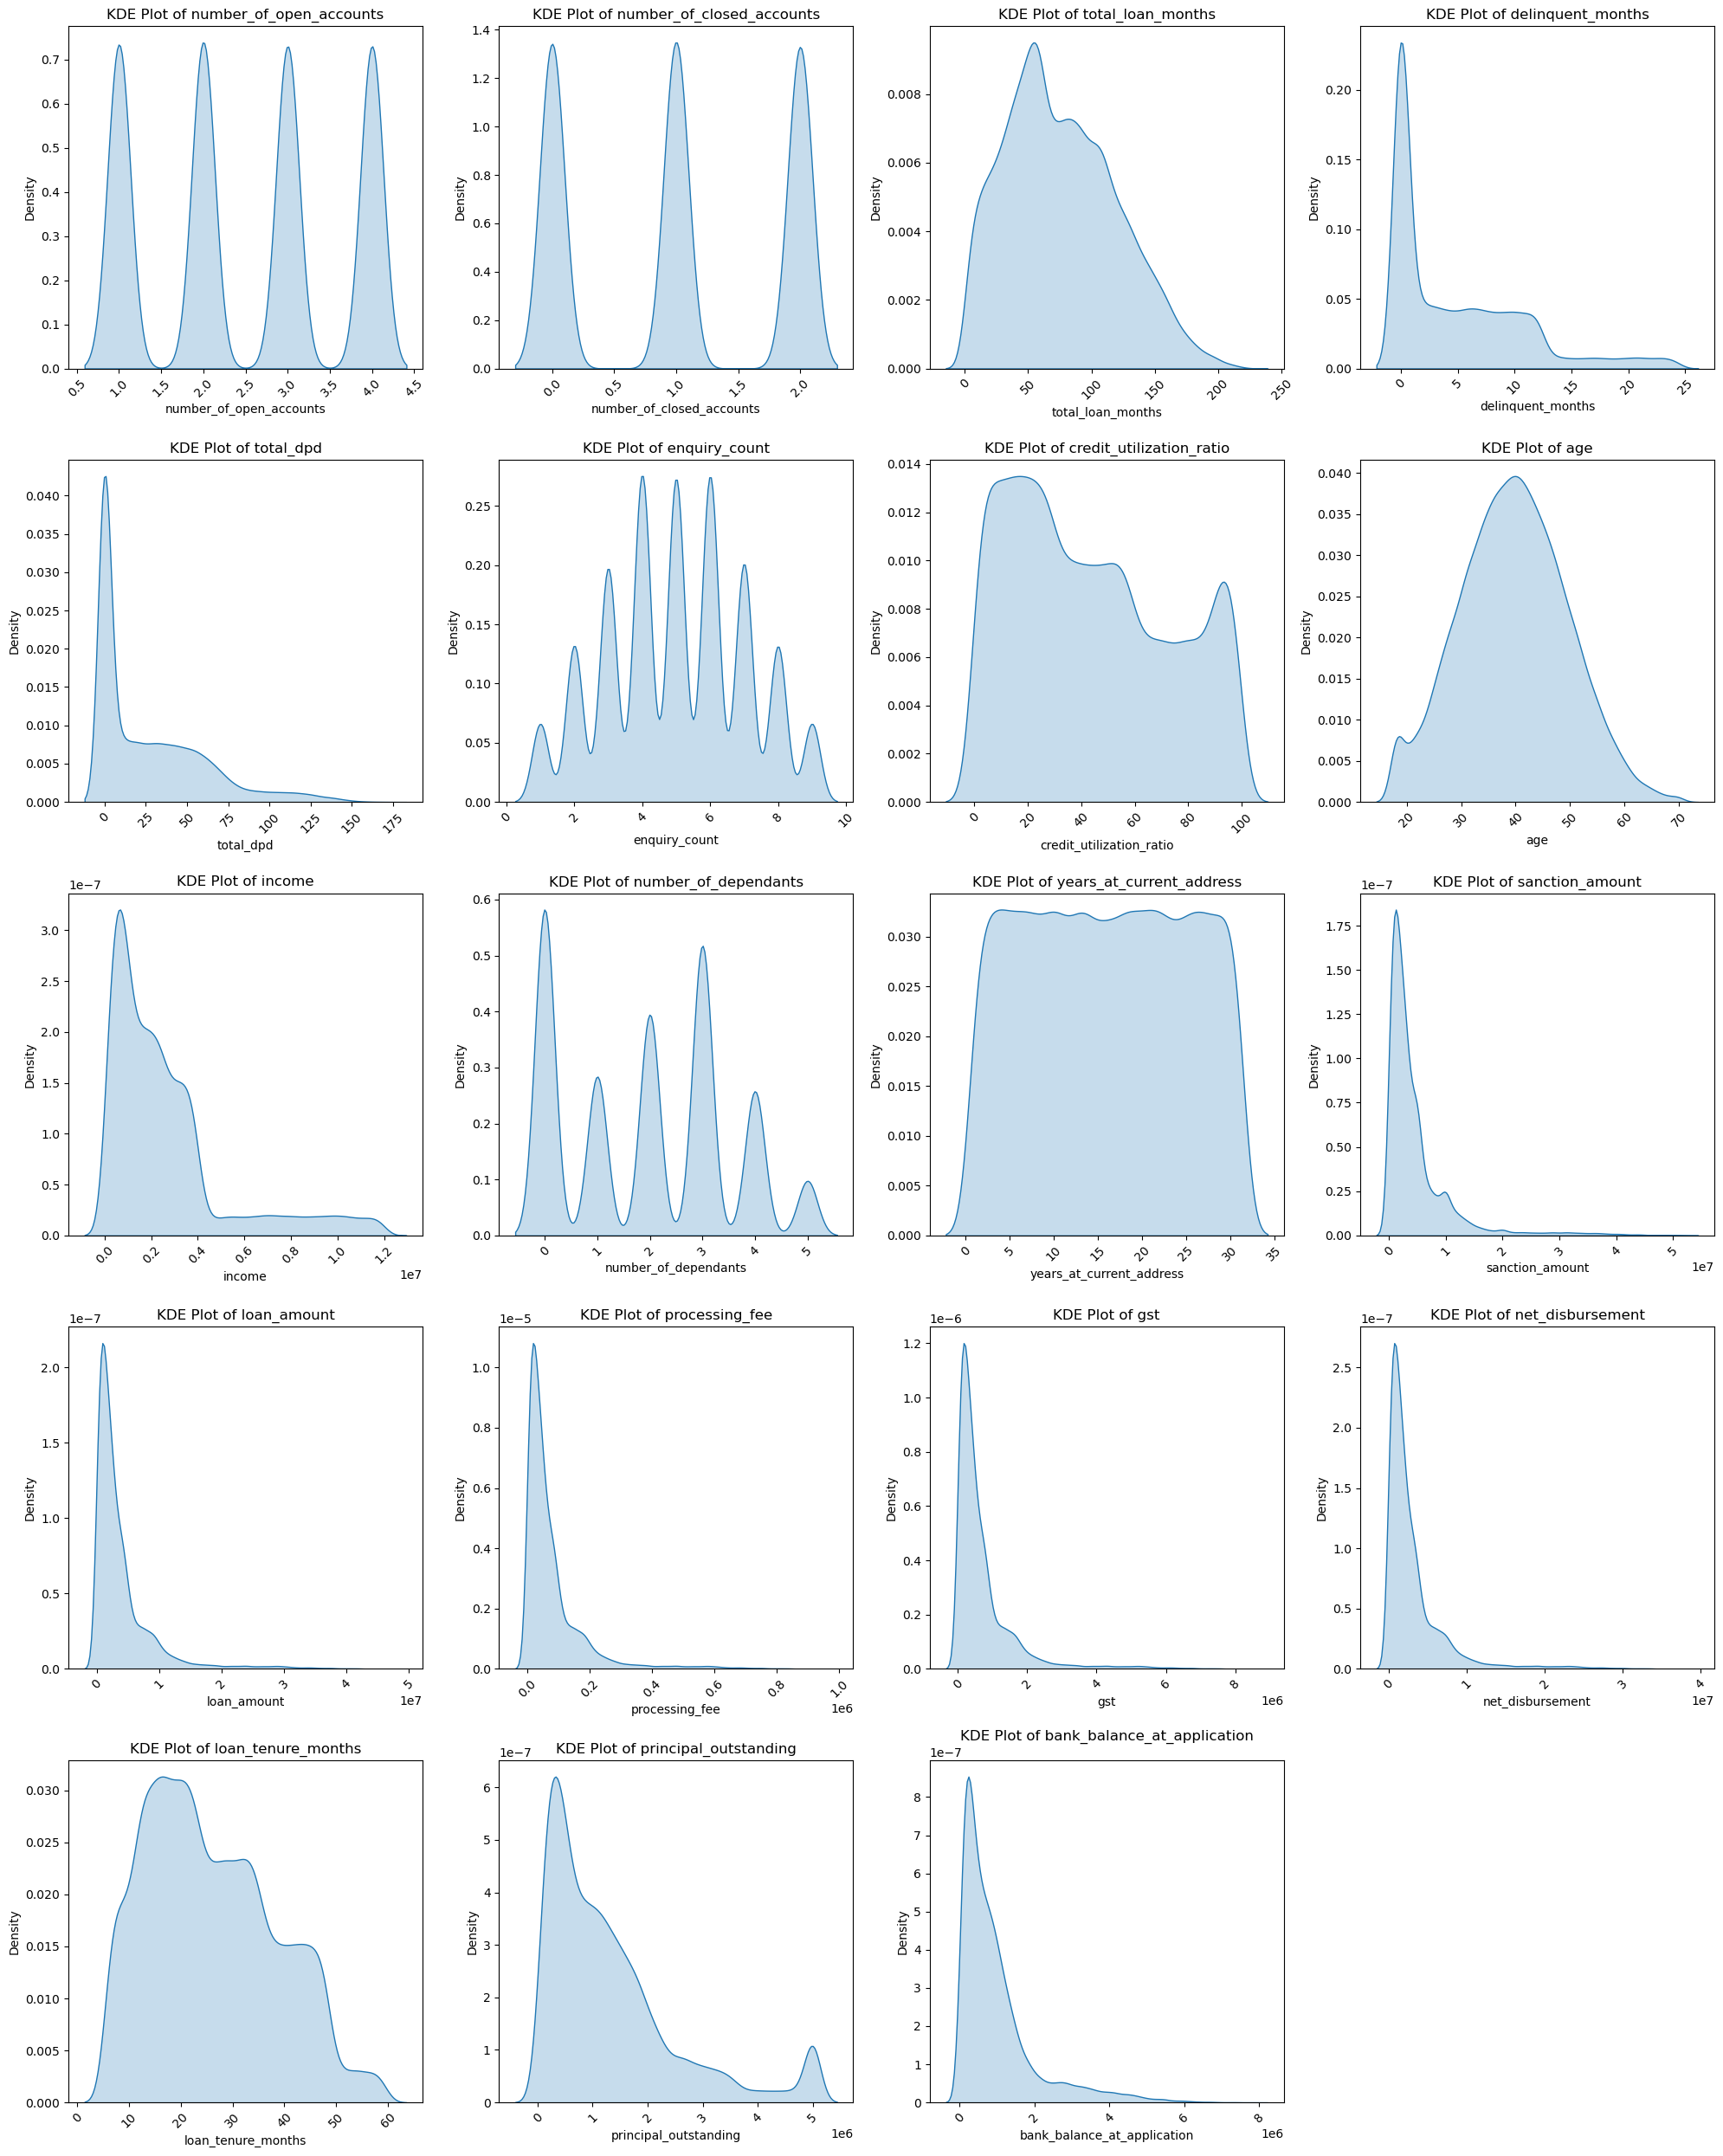

In [57]:
n_cols = 4
n_rows = len(columns_continous) // n_cols + (len(columns_continous) % n_cols != 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns_continous):
    sns.kdeplot(df_train[col], fill=True, ax=axes[i])  
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  
for i in range(len(columns_continous), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()


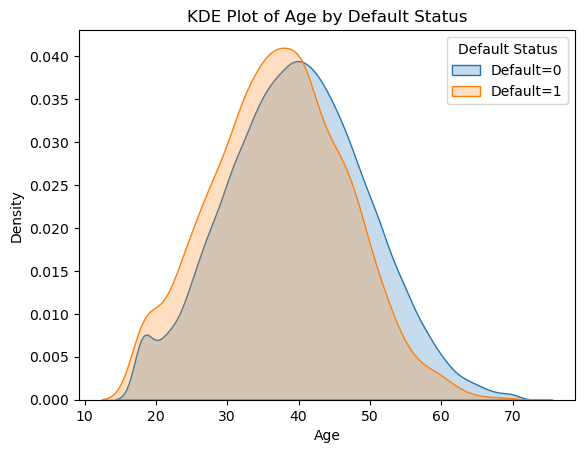

In [58]:
sns.kdeplot(df_train[df_train['default'] == 0]['age'], fill=True, label='Default=0')
sns.kdeplot(df_train[df_train['default'] == 1]['age'], fill=True, label='Default=1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Default Status')
plt.legend(title='Default Status')
plt.show()

Insights:
1) Orange graph is little bit shifted to left of the blue graph which indicates that people with young age are more likely to defaulted

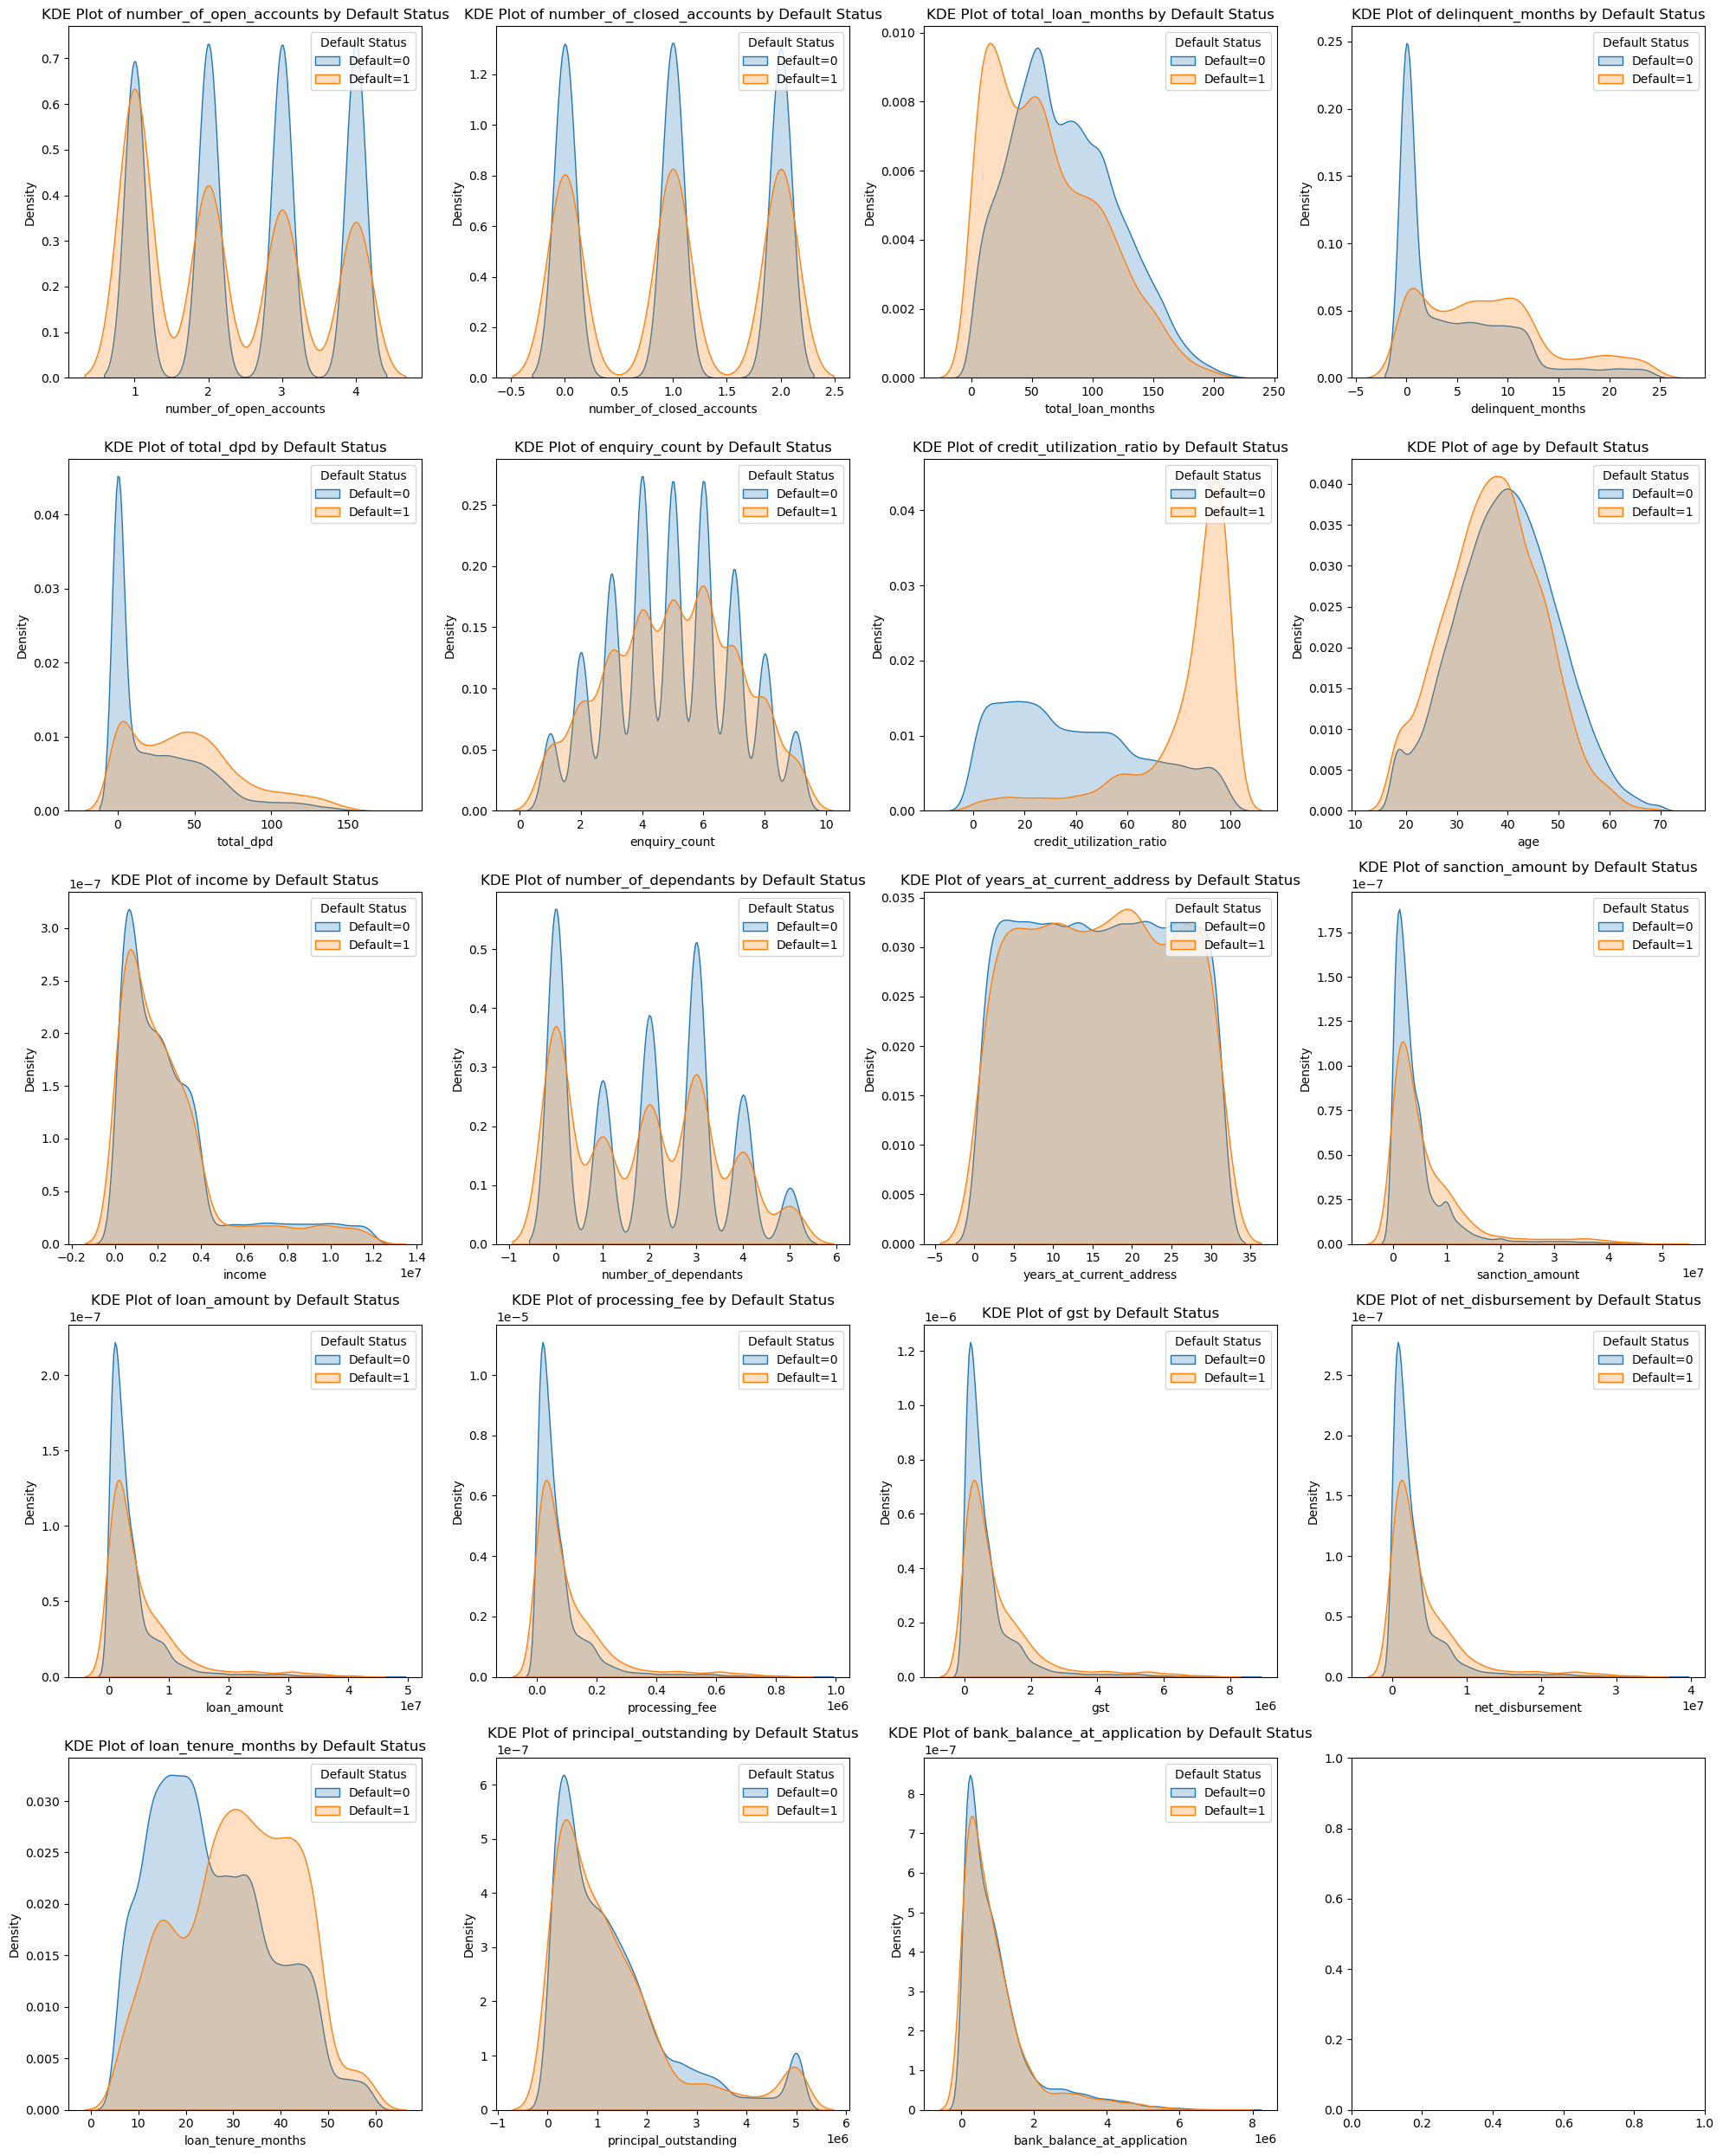

In [60]:
n_cols = 4
n_rows = len(columns_continous) // n_cols + (len(columns_continous) % n_cols != 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns_continous):
    sns.kdeplot(df_train[df_train['default'] == 0][col], fill=True, label='Default=0', ax=axes[i])
    sns.kdeplot(df_train[df_train['default'] == 1][col], fill=True, label='Default=1', ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'KDE Plot of {col} by Default Status')
    axes[i].legend(title='Default Status')
plt.tight_layout()
plt.show()

Insights:
1-A lower number of open accounts is likely to result in default; potential reasons could be a limited credit history. This cannot be causation but can be correlation
2-In the 'Total Loan Months' graph, the orange graph is slightly shifted to the left compared to the blue graph, indicating that people with lower total loan months are more likely to default. One potential reason for this could be that shorter loan tenures result in higher monthly payments, which might become harder to manage, leading to defaults.
3-Records with higher delinquent months are more likely to default, which is self-explanatory.
4-Enquiry count does not appear to have a significant impact on default status.
5-People with a high credit utilization ratio are more likely to default.
6-Lower sanction amount and loan amount are likely to not default.


In [62]:
df_train['credit_utilization_ratio'].describe()

count   37487.000
mean       43.328
std        29.355
min         0.000
25%        18.000
50%        39.000
75%        67.000
max        99.000
Name: credit_utilization_ratio, dtype: float64

In [63]:
df_train.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default'],
      dtype='object')

In [64]:
pd.crosstab(df_train['employment_status'], df_train['default'], normalize='index') * 100


default,0,1
employment_status,,
Salaried,90.972,9.028
Self-Employed,91.781,8.219


In [65]:
pd.crosstab(df_train['loan_type'], df_train['default'], normalize='index') * 100


default,0,1
loan_type,,
Secured,89.299,10.701
Unsecured,95.552,4.448


Due to class imbalance we can see everything is drawing towards not default

### Feature Engineering

In [69]:
df_train.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default'],
      dtype='object')

In [70]:
df_train['loan_to_income']=round(df_train['loan_amount']/df_train['income'],2)


In [71]:
df_train['loan_to_income']

27434   2.900
13400   1.080
883     0.660
7303    1.100
45124   1.840
         ... 
11284   1.360
44732   1.360
38158   2.710
860     1.500
15795   0.780
Name: loan_to_income, Length: 37487, dtype: float64

In [72]:
df_train.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,loan_to_income
27434,C27435,4,2,90,6,33,8,59,45,F,...,65520.000,589680,2620800,24,905176,566117,2022-04-21,2022-05-21,0,2.900
13400,C13401,3,1,119,4,17,4,92,29,M,...,50800.000,457200,2032000,33,1008916,951329,2020-11-24,2020-12-11,0,1.080
883,C00884,2,1,83,14,78,4,83,50,F,...,38400.000,345600,1536000,19,1382399,771873,2019-08-25,2019-09-19,0,0.660
7303,C07304,1,1,37,0,0,5,34,43,F,...,5960.000,53640,238400,21,170015,117343,2020-04-16,2020-05-05,0,1.100
45124,C45125,2,0,62,6,28,5,19,31,F,...,5200.000,46800,208000,45,72025,67719,2024-01-26,2024-02-17,0,1.840


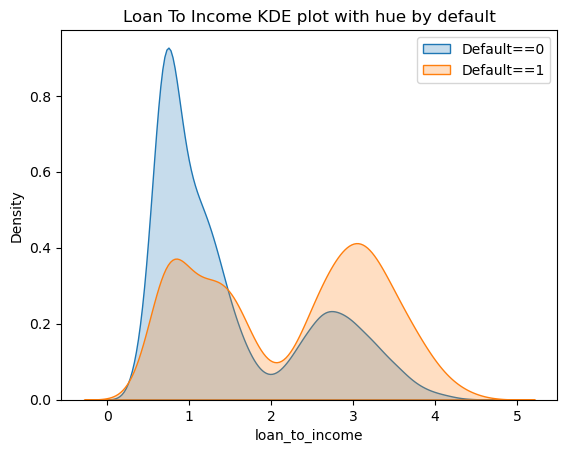

In [73]:
sns.kdeplot(df_train[df_train.default==0]['loan_to_income'],label='Default==0',fill=True)
sns.kdeplot(df_train[df_train.default==1]['loan_to_income'],label='Default==1',fill=True)
plt.title(f'Loan To Income KDE plot with hue by default')
plt.legend()
plt.show()


Insights:
1-When loan to income ratio is higher has more chance of getting defaulted

In [75]:
df_test['loan_to_income']=round(df_test['loan_amount']/df_test['income'],2)

In [76]:
df_train['delinquency_ratio']=round(df_train['delinquent_months']/df_train['total_loan_months'],2)

In [77]:
df_test['delinquency_ratio']=round(df_test['delinquent_months']/df_test['total_loan_months'],2)

In [80]:
df_train['delinquency_ratio'].describe()

count   37487.000
mean        0.104
std         0.173
min         0.000
25%         0.000
50%         0.040
75%         0.130
max         1.000
Name: delinquency_ratio, dtype: float64

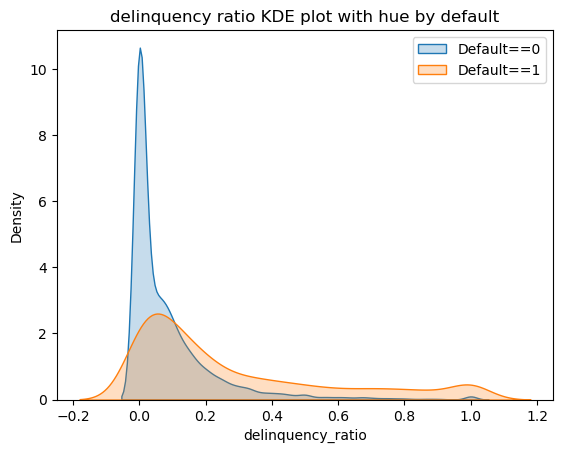

In [81]:
sns.kdeplot(df_train[df_train.default==0]['delinquency_ratio'],fill=True,label='Default==0')
sns.kdeplot(df_train[df_train.default==1]['delinquency_ratio'],fill=True,label='Default==1')
plt.title(f'delinquency ratio KDE plot with hue by default')
plt.legend()
plt.show()

Insights:
     When delinquency ratio is higher has more chance of getting defaulted

In [83]:
df_train['avg_dpd_per_delinquency']=df_train['total_dpd']/df_train['delinquent_months']
df_train.isna().sum()

cust_id                            0
number_of_open_accounts            0
number_of_closed_accounts          0
total_loan_months                  0
delinquent_months                  0
total_dpd                          0
enquiry_count                      0
credit_utilization_ratio           0
age                                0
gender                             0
marital_status                     0
employment_status                  0
income                             0
number_of_dependants               0
residence_type                     0
years_at_current_address           0
city                               0
state                              0
zipcode                            0
loan_id                            0
loan_purpose                       0
loan_type                          0
sanction_amount                    0
loan_amount                        0
processing_fee                     0
gst                                0
net_disbursement                   0
l

For some records total dpd =0 and delinquency months =0 that lead to nulls

In [85]:
df_train['avg_dpd_per_delinquency']=df_train['avg_dpd_per_delinquency'].fillna(0)
df_train.isna().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [86]:
df_test['avg_dpd_per_delinquency']=df_test['total_dpd']/df_test['delinquent_months']
df_test.isna().sum()

cust_id                           0
number_of_open_accounts           0
number_of_closed_accounts         0
total_loan_months                 0
delinquent_months                 0
total_dpd                         0
enquiry_count                     0
credit_utilization_ratio          0
age                               0
gender                            0
marital_status                    0
employment_status                 0
income                            0
number_of_dependants              0
residence_type                    0
years_at_current_address          0
city                              0
state                             0
zipcode                           0
loan_id                           0
loan_purpose                      0
loan_type                         0
sanction_amount                   0
loan_amount                       0
processing_fee                    0
gst                               0
net_disbursement                  0
loan_tenure_months          

Handling Null values

In [88]:
df_test['avg_dpd_per_delinquency']=df_test['avg_dpd_per_delinquency'].fillna(0)
df_test.isna().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [89]:
df_train.shape,df_test.shape

((37487, 36), (12498, 36))

In [92]:
df_train.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,C27435,4,2,90,6,33,8,59,45,F,...,2620800,24,905176,566117,2022-04-21,2022-05-21,0,2.900,0.070,5.500
13400,C13401,3,1,119,4,17,4,92,29,M,...,2032000,33,1008916,951329,2020-11-24,2020-12-11,0,1.080,0.030,4.250
883,C00884,2,1,83,14,78,4,83,50,F,...,1536000,19,1382399,771873,2019-08-25,2019-09-19,0,0.660,0.170,5.571
7303,C07304,1,1,37,0,0,5,34,43,F,...,238400,21,170015,117343,2020-04-16,2020-05-05,0,1.100,0.000,0.000
45124,C45125,2,0,62,6,28,5,19,31,F,...,208000,45,72025,67719,2024-01-26,2024-02-17,0,1.840,0.100,4.667


In [93]:
df_test.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,C33554,2,2,70,3,27,5,12,36,F,...,3771200,34,1541773,1788591,2022-11-30,2022-12-21,0,1.400,0.040,9.000
9427,C09428,4,0,115,0,0,9,85,33,F,...,7064000,39,1355455,810309,2020-07-02,2020-07-15,0,3.240,0.000,0.000
199,C00200,4,1,144,0,0,4,72,28,M,...,2583200,39,538593,332456,2019-07-31,2019-08-02,0,3.010,0.000,0.000
12447,C12448,3,2,93,0,0,4,90,28,M,...,1040000,16,621313,346879,2020-10-20,2020-10-31,0,1.100,0.000,0.000
39489,C39490,4,2,152,20,105,9,53,52,M,...,1694400,26,1490698,497720,2023-07-05,2023-08-02,0,1.020,0.130,5.250


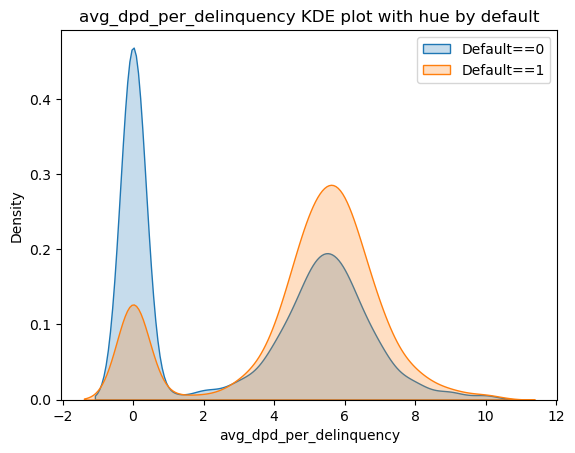

In [94]:
sns.kdeplot(df_train[df_train.default==0]['avg_dpd_per_delinquency'],fill=True,label='Default==0')
sns.kdeplot(df_train[df_train.default==1]['avg_dpd_per_delinquency'],fill=True,label='Default==1')
plt.title(f'avg_dpd_per_delinquency KDE plot with hue by default')
plt.legend()
plt.show()

Insights:
  Higher avg_dpd_per_delinquency leads to default status

### Feature Selection

In [100]:
df_train.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [101]:
df_train_1=df_train.drop(['cust_id','total_dpd','total_loan_months','income','loan_id','loan_amount','delinquent_months','installment_start_dt','disbursal_date'],axis=1)
df_test_1=df_test.drop(['cust_id','total_dpd','total_loan_months','income','loan_id','loan_amount','delinquent_months','installment_start_dt','disbursal_date'],axis=1)

Numeric columns

In [103]:
df_train_1.shape,df_test_1.shape

((37487, 27), (12498, 27))

In [104]:
cols_to_scale=df_train_1.select_dtypes(['int64','float64']).columns
cols_to_scale

Index(['number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'number_of_dependants',
       'years_at_current_address', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [105]:
X_train_1=df_train_1.drop('default',axis=1)
y_train_1=df_train_1['default']
X_test_1=df_test_1.drop('default',axis=1)
y_test_1=df_test_1['default']

Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
Scaler=MinMaxScaler()
X_train_1[cols_to_scale]=Scaler.fit_transform(X_train_1[cols_to_scale])
X_train_1.head()
X_test_1[cols_to_scale]=Scaler.fit_transform(X_test_1[cols_to_scale])

# Varience Inflation Factor(VIF)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
def cal_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Features']=data.columns
    vif_df['vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df
    
    

In [116]:
vif_df_1=cal_vif(X_train_1[cols_to_scale])
vif_df_1

C:\Users\mahim\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,vif
0,number_of_open_accounts,4.345
1,number_of_closed_accounts,2.342
2,enquiry_count,6.320
3,credit_utilization_ratio,2.891
4,age,5.583
5,number_of_dependants,2.723
6,years_at_current_address,3.362
7,sanction_amount,102.152
8,processing_fee,inf
9,gst,inf






Dropping High vif

In [118]:
vif_df_1[vif_df_1['vif']>12]

,Features,vif
7,sanction_amount,102.152
8,processing_fee,inf
9,gst,inf
10,net_disbursement,inf
12,principal_outstanding,16.269


In [119]:
features_to_drop_vif=vif_df_1[vif_df_1['vif']>12]['Features'].tolist()

In [122]:
features_to_drop_vif

['sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'principal_outstanding']

In [123]:
X_train_2=X_train_1.drop(features_to_drop_vif,axis=1)
X_test_2=X_test_1.drop(features_to_drop_vif,axis=1)

In [124]:
X_train_2

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,gender,marital_status,employment_status,number_of_dependants,residence_type,...,city,state,zipcode,loan_purpose,loan_type,loan_tenure_months,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,1.000,1.000,0.875,0.596,0.519,F,Single,Salaried,0.000,Owned,...,Ahmedabad,Gujarat,380001,Home,Secured,0.340,0.070,0.609,0.070,0.550
13400,0.667,0.500,0.375,0.929,0.212,M,Single,Salaried,0.000,Owned,...,Delhi,Delhi,110001,Auto,Secured,0.509,0.119,0.183,0.030,0.425
883,0.333,0.500,0.375,0.838,0.615,F,Single,Self-Employed,0.000,Mortgage,...,Lucknow,Uttar Pradesh,226001,Personal,Unsecured,0.245,0.096,0.084,0.170,0.557
7303,0.000,0.500,0.500,0.343,0.481,F,Single,Self-Employed,0.200,Owned,...,Bangalore,Karnataka,560001,Auto,Secured,0.283,0.013,0.187,0.000,0.000
45124,0.333,0.000,0.500,0.192,0.250,F,Single,Salaried,0.000,Owned,...,Jaipur,Rajasthan,302001,Education,Secured,0.736,0.006,0.361,0.100,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.000,0.500,0.750,0.939,0.288,F,Single,Salaried,0.000,Rented,...,Hyderabad,Telangana,500001,Auto,Secured,0.245,0.177,0.248,0.180,0.548
44732,0.667,0.000,0.250,0.232,0.288,F,Single,Salaried,0.000,Owned,...,Delhi,Delhi,110001,Auto,Secured,0.113,0.153,0.248,0.000,0.000
38158,0.000,1.000,0.125,0.535,0.327,M,Married,Self-Employed,0.600,Rented,...,Kolkata,West Bengal,700001,Home,Secured,0.792,0.124,0.564,0.000,0.000
860,0.667,0.500,0.750,0.172,0.462,F,Married,Salaried,0.800,Owned,...,Mumbai,Maharashtra,400001,Education,Secured,0.302,0.083,0.281,0.040,0.480


In [126]:
selected_num_vif=cal_vif(X_train_1[cols_to_scale].drop(features_to_drop_vif,axis=1))
num_vif=selected_num_vif['Features'].tolist()
num_vif

['number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'age',
 'number_of_dependants',
 'years_at_current_address',
 'loan_tenure_months',
 'bank_balance_at_application',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

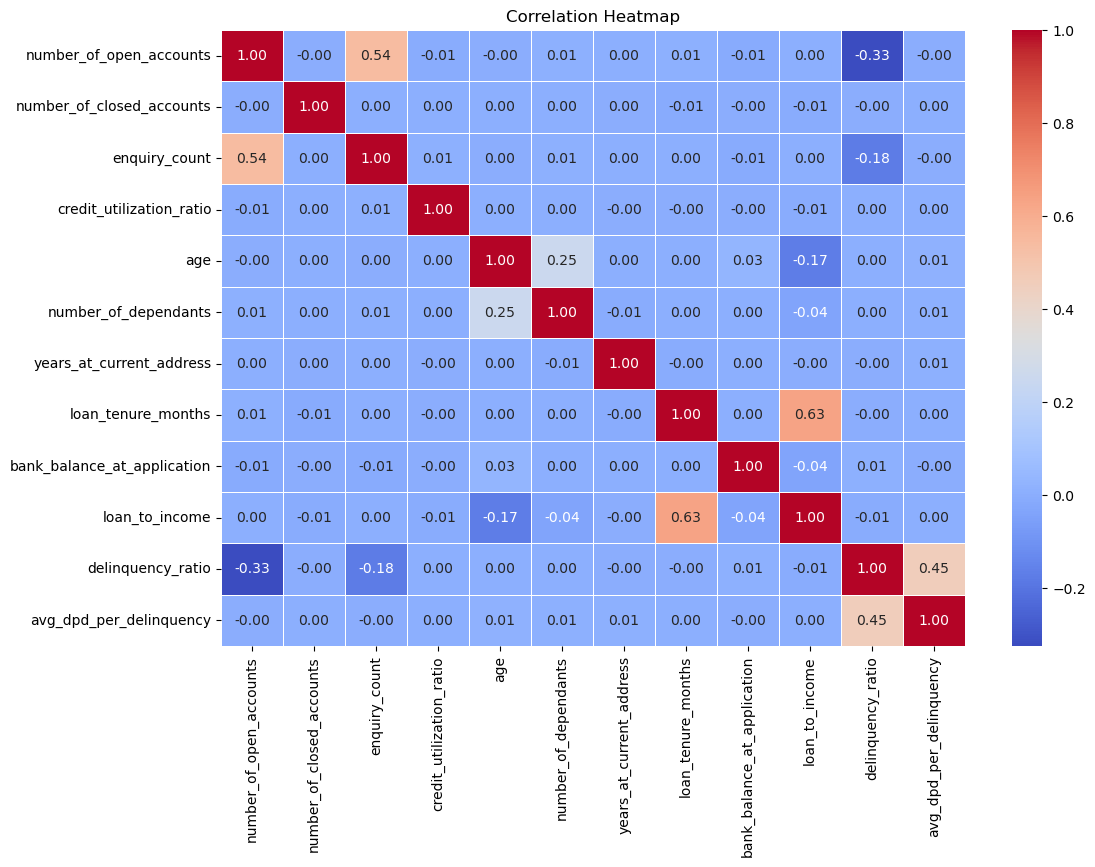

In [128]:
correlation_num=X_train_2[num_vif].corr()
correlation_num
plt.figure(figsize=(12,8)) 
sns.heatmap(correlation_num, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

categorical columns : Weight of evidence(WOE) and Information Value(IV)

In [131]:
X_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_open_accounts      37487 non-null  float64
 1   number_of_closed_accounts    37487 non-null  float64
 2   enquiry_count                37487 non-null  float64
 3   credit_utilization_ratio     37487 non-null  float64
 4   age                          37487 non-null  float64
 5   gender                       37487 non-null  object 
 6   marital_status               37487 non-null  object 
 7   employment_status            37487 non-null  object 
 8   number_of_dependants         37487 non-null  float64
 9   residence_type               37487 non-null  object 
 10  years_at_current_address     37487 non-null  float64
 11  city                         37487 non-null  object 
 12  state                        37487 non-null  object 
 13  zipcode          

In [132]:
categorical_columns=X_train_2.select_dtypes('object').columns
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type'],
      dtype='object')

In [133]:
temp=pd.concat([X_train_2,y_train_1],axis=1)
temp.head()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,gender,marital_status,employment_status,number_of_dependants,residence_type,...,state,zipcode,loan_purpose,loan_type,loan_tenure_months,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,default
27434,1.000,1.000,0.875,0.596,0.519,F,Single,Salaried,0.000,Owned,...,Gujarat,380001,Home,Secured,0.340,0.070,0.609,0.070,0.550,0
13400,0.667,0.500,0.375,0.929,0.212,M,Single,Salaried,0.000,Owned,...,Delhi,110001,Auto,Secured,0.509,0.119,0.183,0.030,0.425,0
883,0.333,0.500,0.375,0.838,0.615,F,Single,Self-Employed,0.000,Mortgage,...,Uttar Pradesh,226001,Personal,Unsecured,0.245,0.096,0.084,0.170,0.557,0
7303,0.000,0.500,0.500,0.343,0.481,F,Single,Self-Employed,0.200,Owned,...,Karnataka,560001,Auto,Secured,0.283,0.013,0.187,0.000,0.000,0
45124,0.333,0.000,0.500,0.192,0.250,F,Single,Salaried,0.000,Owned,...,Rajasthan,302001,Education,Secured,0.736,0.006,0.361,0.100,0.467,0


In [134]:
temp['default'].value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [135]:
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [136]:
def cal_woe_iv(data,feature,target):
    grouped=data.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']
    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()
    grouped['proportion_good']=grouped['good']/total_good
    grouped['proportion_bad']=grouped['bad']/total_bad
    grouped['WOE']=np.log(grouped['proportion_good']/grouped['proportion_bad'])
    grouped['IV']=grouped['WOE']*(grouped['proportion_good']-grouped['proportion_bad'])
    grouped['WOE']=grouped['WOE'].replace([np.inf,-np.inf],0)
    grouped['IV']=grouped['IV'].replace([np.inf,-np.inf],0)
    total_iv=grouped['IV'].sum()
    return grouped,total_iv
cal_woe_iv(temp,'loan_purpose','default')    
    

(              total  good    bad  proportion_good  proportion_bad    WOE    IV
 loan_purpose                                                                  
 Auto           7437   314   7123            0.098           0.208 -0.746 0.082
 Education      5626   546   5080            0.171           0.148  0.145 0.003
 Home          11271  1744   9527            0.547           0.278  0.677 0.182
 Personal      13153   585  12568            0.183           0.366 -0.692 0.127,
 0.39377543144164784)

Now lets find Total IV for all features including continous values(using bins)

In [139]:
pd.cut(temp['loan_to_income'],bins=10)

27434       (0.6, 0.7]
13400       (0.1, 0.2]
883      (-0.001, 0.1]
7303        (0.1, 0.2]
45124       (0.3, 0.4]
             ...      
11284       (0.2, 0.3]
44732       (0.2, 0.3]
38158       (0.5, 0.6]
860         (0.2, 0.3]
15795       (0.1, 0.2]
Name: loan_to_income, Length: 37487, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [140]:
IV_Values={}
for feature in X_train_2.columns:
    if X_train_2[feature].dtype=='object':
        _,IV=cal_woe_iv(temp,feature,'default')
    else:
        X_binned=pd.cut(temp[feature],bins=10,labels=False)
        _,IV=cal_woe_iv(pd.concat([X_binned,y_train_1],axis=1),feature,'default') 
    IV_Values[feature]=IV
IV_Values    
    
        
        
        

{'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.000817870465334103,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'loan_to_income': 0.4915664145044282,
 'delinquency_ratio': 0.67818280349235,
 'avg_dpd_per_delinquency': 0.42123646562822287}

In [141]:
iv_df = pd.DataFrame(list(IV_Values.items()), columns=['Feature', 'IV'])
features_iv=iv_df[iv_df['IV']>0.02]
selected_features_iv=features_iv['Feature'].tolist()

In [143]:
selected_features_iv

['number_of_open_accounts',
 'credit_utilization_ratio',
 'age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [145]:
X_train_reduced=X_train_2[selected_features_iv]
X_test_reduced=X_test_2[selected_features_iv]

In [146]:
X_train_reduced.head()

,number_of_open_accounts,credit_utilization_ratio,age,residence_type,loan_purpose,loan_type,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,1.000,0.596,0.519,Owned,Home,Secured,0.340,0.609,0.070,0.550
13400,0.667,0.929,0.212,Owned,Auto,Secured,0.509,0.183,0.030,0.425
883,0.333,0.838,0.615,Mortgage,Personal,Unsecured,0.245,0.084,0.170,0.557
7303,0.000,0.343,0.481,Owned,Auto,Secured,0.283,0.187,0.000,0.000
45124,0.333,0.192,0.250,Owned,Education,Secured,0.736,0.361,0.100,0.467


In [147]:
X_test_reduced.head()

,number_of_open_accounts,credit_utilization_ratio,age,residence_type,loan_purpose,loan_type,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,0.333,0.121,0.346,Owned,Education,Secured,0.528,0.256,0.040,0.900
9427,1.000,0.859,0.288,Owned,Home,Secured,0.623,0.685,0.000,0.000
199,1.000,0.727,0.192,Owned,Home,Secured,0.623,0.632,0.000,0.000
12447,0.667,0.909,0.192,Rented,Auto,Secured,0.189,0.186,0.000,0.000
39489,1.000,0.535,0.654,Owned,Auto,Secured,0.377,0.168,0.130,0.525


In [148]:
X_train_encoded=pd.get_dummies(X_train_reduced,columns=['residence_type','loan_purpose','loan_type'],drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,columns=['residence_type','loan_purpose','loan_type'],drop_first=True)

In [150]:
X_train_encoded.head()

,number_of_open_accounts,credit_utilization_ratio,age,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,1.000,0.596,0.519,0.340,0.609,0.070,0.550,True,False,False,True,False,False
13400,0.667,0.929,0.212,0.509,0.183,0.030,0.425,True,False,False,False,False,False
883,0.333,0.838,0.615,0.245,0.084,0.170,0.557,False,False,False,False,True,True
7303,0.000,0.343,0.481,0.283,0.187,0.000,0.000,True,False,False,False,False,False
45124,0.333,0.192,0.250,0.736,0.361,0.100,0.467,True,False,True,False,False,False


In [151]:
X_test_encoded.head()

,number_of_open_accounts,credit_utilization_ratio,age,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.333,0.121,0.346,0.528,0.256,0.040,0.900,True,False,True,False,False,False
9427,1.000,0.859,0.288,0.623,0.685,0.000,0.000,True,False,False,True,False,False
199,1.000,0.727,0.192,0.623,0.632,0.000,0.000,True,False,False,True,False,False
12447,0.667,0.909,0.192,0.189,0.186,0.000,0.000,False,True,False,False,False,False
39489,1.000,0.535,0.654,0.377,0.168,0.130,0.525,True,False,False,False,False,False


### Model Training and Evaluation

Attempt-1:
logisticRegression,RandomForest,XGB
Not Handling of class imbalance

In [156]:
model_lr=LogisticRegression(max_iter=2000)
model_lr.fit(X_train_encoded,y_train_1)
lr_pred=model_lr.predict(X_test_encoded)
report=classification_report(y_test_1,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [157]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train_encoded,y_train_1)
rf_pred=model_rf.predict(X_test_encoded)
report_1=classification_report(y_test_1,rf_pred)
print(report_1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [160]:
model_XGB=XGBClassifier()
model_XGB.fit(X_train_encoded,y_train_1)
XGB_pred=model_XGB.predict(X_test_encoded)
report_2=classification_report(y_test_1,XGB_pred)
print(report_2)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.71      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [161]:
from scipy.stats import uniform

In [163]:
param_dist = {
    'C': uniform(0.001, 10),  
    'solver': ['liblinear', 'saga','liblinear','newton-cg'] 
} 

Random_search=RandomizedSearchCV(model_lr,param_dist,n_iter=10,cv=3,scoring='f1',random_state=1)
Random_search.fit(X_train_encoded,y_train_1)
Random_search.best_estimator_
lr_best_pred=Random_search.best_estimator_.predict(X_test_encoded)
lr_best_report=classification_report(y_test_1,lr_best_pred)
print(lr_best_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [281]:
from scipy.stats import uniform, randint

In [282]:
param_dist_XGB = {
    'n_estimators': randint(100, 1000),  
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage
    'max_depth': randint(3, 15),  # Maximum depth of a tree
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for training
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features for each tree
    'gamma': uniform(0, 5),  # Minimum loss reduction required for further partition
    'reg_lambda': uniform(0, 5),  # L2 regularization term
    'reg_alpha': uniform(0, 5),  # L1 regularization term
    'min_child_weight': randint(1, 10)  # Minimum sum of instance weight needed in a child
}
Random_search_XGB=RandomizedSearchCV(model_XGB,param_dist_XGB,n_iter=20,scoring='recall',cv=3,random_state=2)
Random_search_XGB.fit(X_train_encoded,y_train_1)
Random_search_XGB.best_estimator_
XGB_best_pred=Random_search_XGB.best_estimator_.predict(X_test_encoded)
XGB_best_report=classification_report(y_test_1,XGB_best_pred)
print(XGB_best_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



Attempt-2
Attempt-1:
logisticRegression,XGB
Handling of class imbalance with undersampling

In [284]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=3)
X_rus_train,y_rus_train=rus.fit_resample(X_train_encoded,y_train_1)
y_rus_train.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [285]:
model_lr_rus=LogisticRegression(max_iter=2000)
model_lr_rus.fit(X_rus_train,y_rus_train)
lr_pred_rus=model_lr_rus.predict(X_test_encoded)
report_lr_rus=classification_report(y_test_1,lr_pred_rus)
print(report_lr_rus)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11390
           1       0.52      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.81     12498
weighted avg       0.95      0.92      0.93     12498



In [286]:
model_XGB_rus=XGBClassifier()
model_XGB_rus.fit(X_rus_train,y_rus_train)
XGB_pred_rus=model_XGB_rus.predict(X_test_encoded)
report_2_rus=classification_report(y_test_1,XGB_pred_rus)
print(report_2_rus)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.57      0.96      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



Recall increased but f1 decreased

Attempt-3 LogisticRegression,Handle class imbalance with SMOTETOMEK and parameter tuning with Optuna

In [289]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=4)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train_1)
print(Counter(y_train_smt))

Counter({0: 34212, 1: 34212})


In [290]:
model_lr_smt=LogisticRegression()
model_lr_smt.fit(X_train_smt,y_train_smt)
lr_pred_smt=model_lr.predict(X_test_encoded)
report_lr_smt=classification_report(y_test_1,lr_pred_smt)
print(report_lr_smt)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.51      0.96      0.67      1108

    accuracy                           0.91     12498
   macro avg       0.75      0.94      0.81     12498
weighted avg       0.95      0.91      0.93     12498



In [291]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train_1)
print(Counter(y_train_smote))

Counter({0: 34298, 1: 34298})


In [292]:

model_lr.fit(X_train_smote,y_train_smote)
lr_pred_smote=model_lr.predict(X_test_encoded)
report_lr_smote=classification_report(y_test_1,lr_pred_smote)
print(report_lr_smote)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [293]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train_encoded, y_train_1)


In [294]:
model_lr.fit(X_train_smote_enn, y_train_smote_enn)
lr_pred_smote_enn=model_lr.predict(X_test_encoded)
report_lr_smote_enn=classification_report(y_test_1,lr_pred_smote_enn)
print(report_lr_smote_enn)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.51      0.96      0.67      1108

    accuracy                           0.91     12498
   macro avg       0.75      0.94      0.81     12498
weighted avg       0.95      0.91      0.93     12498



In [322]:
import optuna

In [331]:
from sklearn.metrics import f1_score, make_scorer

In [356]:
def objective(trial):
   param = {
    "C": trial.suggest_float('C',1e-5, 10,log=True),  # Regularization strength
    "solver": trial.suggest_categorical('solver',["lbfgs", "liblinear", "saga"]),  # Optimization solver
    "tol": trial.suggest_float('tol',1e-6, 1e-2),  # Tolerance for stopping criteria
    "class_weight": trial.suggest_categorical('class_weight',[None, "balanced"])  # Handles class imbalance
     }
   model_1=LogisticRegression(**param,max_iter=10000)
   f1_scorer=make_scorer(f1_score,average='macro')
   scores = cross_val_score(model_1, X_train_smote, y_train_smote, cv=5, scoring=f1_scorer, n_jobs=1)
   return np.mean(scores) 
study_logistic=optuna.create_study(direction='maximize')
study_logistic.optimize(objective,n_trials=50)
    

[I 2025-03-28 10:56:25,798] A new study created in memory with name: no-name-3449ca98-f559-4277-85a8-ca271078b161
[I 2025-03-28 10:56:28,922] Trial 0 finished with value: 0.9413778495142706 and parameters: {'C': 0.2177406995009447, 'solver': 'liblinear', 'tol': 0.0011439250366607862, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9413778495142706.
[I 2025-03-28 10:56:30,802] Trial 1 finished with value: 0.9216708641060667 and parameters: {'C': 0.010250647364148113, 'solver': 'liblinear', 'tol': 0.005965021645752709, 'class_weight': None}. Best is trial 0 with value: 0.9413778495142706.
[I 2025-03-28 10:56:33,687] Trial 2 finished with value: 0.9439688157310412 and parameters: {'C': 1.3030640284263717, 'solver': 'liblinear', 'tol': 0.007767498421157433, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9439688157310412.
[I 2025-03-28 10:56:34,677] Trial 3 finished with value: 0.9039892996810781 and parameters: {'C': 0.001512445591604294, 'solver': 'lbfgs', 'tol': 0.

In [358]:
print('best trial:')
trial=study_logistic.best_trial
print('f1_score: {}'.format(trial.value))
best_model_logistic=LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smote, y_train_smote)
lr_pred_best=best_model_logistic.predict(X_test_encoded)
best_lr_report=classification_report(y_test_1,lr_pred_best)
print(best_lr_report)



best trial:
f1_score: 0.9444406669555981
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.84     12498
weighted avg       0.96      0.93      0.94     12498



Attempt-4 XGB,handling class Imbalance with smote and using Optuna

In [361]:
mopdel_XGB=XGBClassifier

In [363]:
model_XGB.fit(X_train_smote,y_train_smote)
XGB_pred_smote=model_XGB.predict(X_test_encoded)
report_XGB_smote=classification_report(y_test_1,XGB_pred_smote)
print(report_XGB_smote)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.76      0.82      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [364]:
model_XGB.fit(X_train_smote_enn, y_train_smote_enn)
XGB_pred_smote_enn=model_XGB.predict(X_test_encoded)
report_XGB_smote_enn=classification_report(y_test_1,XGB_pred_smote_enn)
print(report_XGB_smote_enn)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11390
           1       0.63      0.93      0.75      1108

    accuracy                           0.95     12498
   macro avg       0.81      0.94      0.86     12498
weighted avg       0.96      0.95      0.95     12498



In [365]:
model_XGB.fit(X_train_smt,y_train_smt)
XGB_pred_smt=model_XGB.predict(X_test_encoded)
report_XGB_smt=classification_report(y_test_1,XGB_pred_smt)
print(report_XGB_smt)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.75      0.83      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [373]:
def objective(trial):
    param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0,
    'booster': 'gbtree',
    'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
    'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
    'subsample': trial.suggest_float('subsample', 0.4, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
    'max_depth': trial.suggest_int('max_depth', 3, 10),
    'eta': trial.suggest_float('eta', 0.01, 0.3),
    'gamma': trial.suggest_float('gamma', 0, 10),
    'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }
    model_2=XGBClassifier(**param)
    f1_scorer=make_scorer(f1_score,average='macro')
    scores=cross_val_score(model_2,X_train_smote_enn, y_train_smote_enn,scoring=f1_scorer,n_jobs=1,cv=5)
    return np.mean(scores)
study_XGB=optuna.create_study(direction='maximize')
study_XGB.optimize(objective,n_trials=75)
    



[I 2025-03-28 11:06:20,064] A new study created in memory with name: no-name-1d683ccc-79ac-4822-9af7-f0afccfb191a
[I 2025-03-28 11:06:36,007] Trial 0 finished with value: 0.9811520272690369 and parameters: {'lambda': 0.0026605234325244444, 'alpha': 7.51609904446674, 'subsample': 0.5025639886448694, 'colsample_bytree': 0.7493582011012272, 'max_depth': 9, 'eta': 0.08025492518679879, 'gamma': 1.8583093446145704, 'scale_pos_weight': 7.989904108682793, 'min_child_weight': 10, 'max_delta_step': 7}. Best is trial 0 with value: 0.9811520272690369.
[I 2025-03-28 11:06:47,022] Trial 1 finished with value: 0.9802773774175286 and parameters: {'lambda': 1.2163124741877565, 'alpha': 0.08706371694124633, 'subsample': 0.5438425781869513, 'colsample_bytree': 0.47060026955931855, 'max_depth': 4, 'eta': 0.16809567906540054, 'gamma': 8.345815177374691, 'scale_pos_weight': 3.6872894290744744, 'min_child_weight': 10, 'max_delta_step': 7}. Best is trial 0 with value: 0.9811520272690369.
[I 2025-03-28 11:06:5

KeyboardInterrupt: 

In [378]:
print('best trial:')
trial=study_XGB.best_trial
print('f1_score: {}'.format(trial.value))
best_model_XGB=XGBClassifier(**study_XGB.best_params)
best_model_XGB.fit(X_train_smote_enn, y_train_smote_enn)
XGB_pred_best=best_model_XGB.predict(X_test_encoded)
best_XGB_report=classification_report(y_test_1,XGB_pred_best)
print(best_XGB_report)

best trial:
f1_score: 0.9929608923248455
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11390
           1       0.65      0.92      0.76      1108

    accuracy                           0.95     12498
   macro avg       0.82      0.93      0.87     12498
weighted avg       0.96      0.95      0.95     12498



In [380]:
best_model_logistic.fit(X_train_smote, y_train_smote)
lr_pred_best=best_model_logistic.predict(X_test_encoded)
best_lr_report=classification_report(y_test_1,lr_pred_best)
print(best_lr_report)


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.84     12498
weighted avg       0.96      0.93      0.94     12498



best_model_XGB model is doing better 

ROC and AUC

In [393]:
from sklearn.metrics import auc, roc_curve

In [405]:
probabilities=best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr,tpr,thresholds=roc_curve(y_test_1,probabilities)
fpr[:10], tpr[:10], thresholds[:10]


(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.20487365, 0.20487365, 0.23194946,
        0.23194946, 0.26353791, 0.26353791, 0.30415162, 0.30415162]),
 array([       inf, 0.9999999 , 0.99851081, 0.99850325, 0.99797549,
        0.99797209, 0.9970843 , 0.99707822, 0.99589225, 0.99586319]))

In [409]:
area=auc(fpr,tpr)
area

0.9830207636694424

In [413]:
from sklearn.metrics import roc_curve

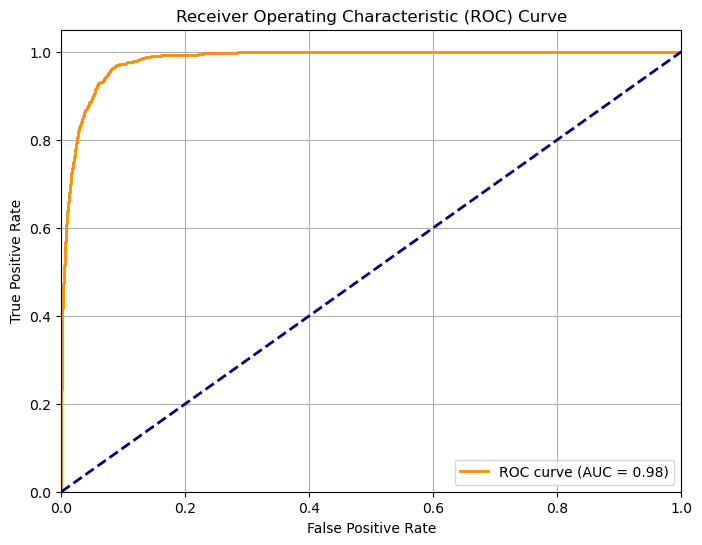

In [417]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {area:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [430]:
probabilities_1=best_model_XGB.predict_proba(X_test_encoded)[:,1]
fpr_1,tpr_1,thresholds_1=roc_curve(y_test_1,probabilities_1)
fpr_1[:10], tpr_1[:10], thresholds_1[:10]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.        , 0.00090253, 0.00902527, 0.01083032, 0.01173285,
        0.01353791, 0.01444043, 0.01624549, 0.01805054, 0.0198556 ]),
 array([       inf, 0.9999999 , 0.9999994 , 0.9999993 , 0.99999917,
        0.99999905, 0.9999989 , 0.9999988 , 0.9999981 , 0.999998  ],
       dtype=float32))

In [432]:
area_1=auc(fpr_1,tpr_1)
area_1

0.9854699479878163

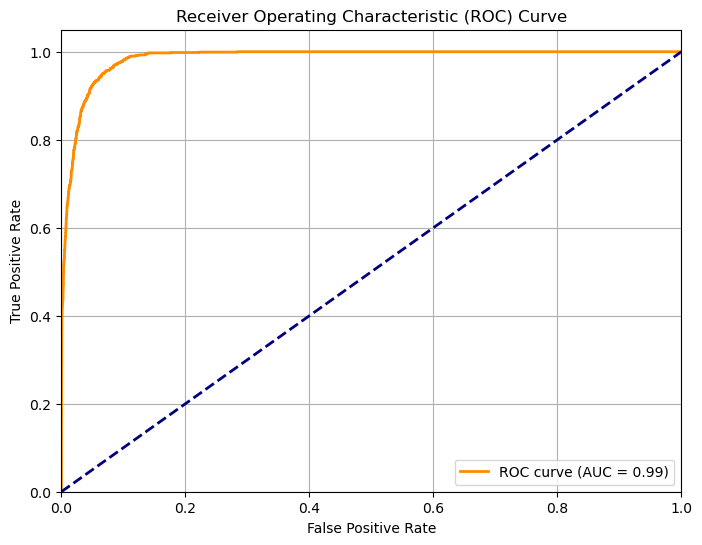

In [434]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'ROC curve (AUC = {area_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### KS-statistics

In [487]:
df_eval=pd.DataFrame({'Default_truth':y_test_1,
                      'Default_probabilities':probabilities_1
                     })
df_eval.head()

,Default_truth,Default_probabilities
33553,0,0.000
9427,0,0.886
199,0,0.005
12447,0,0.597
39489,0,0.000


In [489]:
df_eval['Decile']=pd.qcut(df_eval['Default_probabilities'],10,labels=False,duplicates='drop')
df_eval.head()

,Default_truth,Default_probabilities,Decile
33553,0,0.000,5
9427,0,0.886,9
199,0,0.005,7
12447,0,0.597,8
39489,0,0.000,1


In [491]:
df_grouped = df_eval.groupby('Decile').apply(
    lambda x: pd.Series({
        'Minimum_probabilities': x['Default_probabilities'].min(),
        'Maximum_probabilities': x['Default_probabilities'].max(),
        'Events': x['Default_truth'].sum(),
        'Non_Events': x['Default_truth'].count() - x['Default_truth'].sum()
    }),
    include_groups=False 
)


    

In [493]:
df_grouped=df_grouped.sort_values('Decile',ascending=False)
df_grouped

,Minimum_probabilities,Maximum_probabilities,Events,Non_Events
Decile,,,,
9,0.829,1.000,926.000,324.000
8,0.024,0.829,173.000,1077.000
7,0.001,0.024,8.000,1242.000
6,0.000,0.001,1.000,1248.000
5,0.000,0.000,0.000,1250.000
4,0.000,0.000,0.000,1250.000
3,0.000,0.000,0.000,1249.000
2,0.000,0.000,0.000,1250.000
1,0.000,0.000,0.000,1250.000


In [495]:
df_grouped['Events_rate']=(df_grouped['Events']*100)/(df_grouped['Events']+df_grouped['Non_Events'])
df_grouped['NON_Events_rate']=(df_grouped['Non_Events']*100)/(df_grouped['Events']+df_grouped['Non_Events'])

In [499]:
df_grouped['Cummulative_Events']=df_grouped['Events'].cumsum()
df_grouped['Cummulative_Non_Events']=df_grouped['Non_Events'].cumsum()

In [503]:
df_grouped['Cummulative_Events_rate']=(df_grouped['Cummulative_Events']*100)/df_grouped['Events'].sum()
df_grouped['Cummulative_Non_Events_rate']=(df_grouped['Cummulative_Non_Events']*100)/df_grouped['Non_Events'].sum()

In [509]:
df_grouped['ks']=abs(df_grouped['Cummulative_Events_rate']-df_grouped['Cummulative_Non_Events_rate'])
df_grouped

,Minimum_probabilities,Maximum_probabilities,Events,Non_Events,Events_rate,NON_Events_rate,Cummulative_Events,Cummulative_Non_Events,Cummulative_Events_rate,Cummulative_Non_Events_rate,ks
Decile,,,,,,,,,,,
9,0.829,1.000,926.000,324.000,74.080,25.920,926.000,324.000,83.574,2.845,80.729
8,0.024,0.829,173.000,1077.000,13.840,86.160,1099.000,1401.000,99.188,12.300,86.887
7,0.001,0.024,8.000,1242.000,0.640,99.360,1107.000,2643.000,99.910,23.205,76.705
6,0.000,0.001,1.000,1248.000,0.080,99.920,1108.000,3891.000,100.000,34.162,65.838
5,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,5141.000,100.000,45.136,54.864
4,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975


### Final model and its feature importance

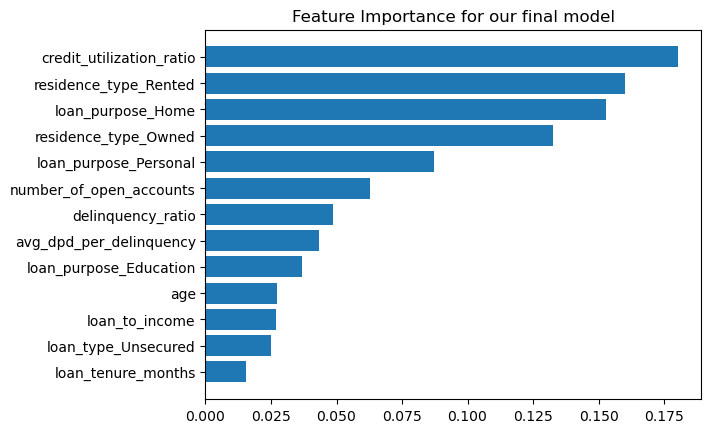

In [538]:
final_model=best_model_XGB
importance = final_model.feature_importances_
feature_imp_df=pd.DataFrame(importance,index=X_train_encoded.columns,columns=['Feature_importance'])
feature_imp_df=feature_imp_df.sort_values(by='Feature_importance',ascending=True)
feature_imp_df
plt.barh(feature_imp_df.index,feature_imp_df['Feature_importance'])
plt.title('Feature Importance for our final model')
plt.show()

In [543]:
from joblib import dump
model_data={'model':final_model,
            'features':X_train_encoded.columns,
            'scaler':Scaler,
            'cols_to_scale': cols_to_scale
           }
dump(model_data,'Artifacts/model_data.joblib')

['Artifacts/model_data.joblib']

In [547]:
gini_coef=(2*area_1)-1
gini_coef

0.9709398959756326